# EDA project 

## 부동산 프로젝트
- 조대선, 김정원

### 가설

#### 1. 분양가격과 실제 아파트의 가격은 깊은 관계가 있다. 
- 분양가 지수 데이터를 대형, 중형, 소형으로 분류하여 분석
- 분양가의 평균가격, 실거래가의 평균가격을 비교 분석

#### 2. 분양가격이 높은 부동산의 수익률은 분양가격이 낮은 곳보다 더 좋을 것이다. 

#### 3. 부동산이 다른 금융상품 투자에 비해 수익률이 더 좋을 것이다. 

In [126]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib as mpl
import scipy.stats
pd.set_option('display.max_columns', 500)

In [99]:
from matplotlib import rc
%matplotlib inline

In [100]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

### 분양가 데이터

In [127]:
# 1-1. 분양가 지수 데이터 임포트
df_init = pd.read_csv("./dataset/HUG_분양가_임포트용.csv", encoding="utf-8")
df_init

규모   지역  2015.10  2015.11  2015.12  2016.01  2016.02  2016.03  2016.04  \
0    소형   전국    83.40    84.50    86.90    87.20    87.50    87.50    87.90   
1   중소형   전국    88.20    88.70    89.60    90.30    90.20    90.50    91.70   
2   중대형   전국    84.80    86.30    86.00    86.00    87.50    90.10    92.10   
3    대형   전국    87.30    90.10    90.20    89.90    89.40    90.20    93.20   
4    소형  수도권    94.30    91.25    94.15    94.15    94.15    96.10    95.55   
5   중소형  수도권    93.05    92.55    94.15    94.00    93.40    93.25    93.55   
6   중대형  수도권    99.40    97.95    98.75    98.75    97.80    97.55    98.00   
7    대형  수도권    80.95    81.50    83.05    83.05    80.80    80.95    94.90   
8    소형   지방    85.30    85.50    87.70    87.90    88.30    87.40    87.60   
9   중소형   지방    87.00    87.30    88.20    88.80    89.00    88.90    89.90   
10  중대형   지방    89.50    88.20    89.30    89.30    89.40    89.80    90.20   
11   대형   지방    93.20    94.60    94.40    94.00    94.10    88.20    94.90   
12   소형   서울    81.50    91.20    91.20    92.70    92.90    94.50    95.50   
13  중소형   서울    99.70   101.10   101.10   102.30   102.40   103.90   105.00   
14  중대형   서울    78.30    97.00    89.10    89.10    89.10    98.20   110.70   
15   대형   서울    85.50    95.20    95.20    95.20    93.90    92.60    92.30   

    2016.05  2016.06  2016.07  2016.08  2016.09  2016.10  2016.11  2016.12  \
0     88.60    88.30    88.30    88.10     89.6    91.60    91.80    93.30   
1     92.00    93.30    93.60    93.70     93.3    95.50    94.90    95.50   
2     91.40    93.10    93.40    92.80     92.7    90.70    91.30    92.20   
3     92.30    92.30    92.70    93.90     94.0    97.80   100.30   102.10   
4     99.80    95.50    95.40    96.00     91.3    92.70    95.85    96.10   
5     96.40   100.85    99.55   100.10     94.2    95.75    97.25    97.20   
6     95.05    95.80    96.00    95.45     93.8    93.35    95.20    93.60   
7     92.45    87.55    88.40    87.80     88.2    95.85    95.95    95.95   
8     87.90    88.30    88.30    88.00     89.6    91.90    91.50    93.60   
9     89.90    90.90    91.10    91.10     91.5    93.80    92.80    93.50   
10    90.80    92.30    92.60    93.10     92.7    94.60    95.70    96.80   
11    94.50    95.70    95.90    96.90     96.9    96.00   100.40   101.80   
12    95.80    94.70    95.40    95.10     94.7    96.10    96.60    96.90   
13   105.20   105.40   108.50   108.90    108.7   110.80   110.30   110.10   
14   105.70   105.80   105.80    99.40    101.4   101.20    92.30    96.20   
15    92.30    92.50    92.60    96.00     95.5   105.20    92.30    98.40   

    2017.01  2017.02  2017.03  2017.04  2017.05  2017.06  2017.07  2017.08  \
0     93.50    93.80    94.60     96.1    97.10    96.60    98.20    98.20   
1     95.40    95.60    95.50     96.8    98.10    98.80   100.20   100.00   
2     92.20    91.70    91.70     91.8    92.90    95.50    97.40    97.70   
3    102.20   102.60   101.90    102.8   104.80   104.60   104.20   104.70   
4     96.20    97.00    99.70    100.2    97.75    98.30    98.90    99.95   
5     97.20    98.45    98.85     98.4    98.85   100.05   101.65   100.90   
6     93.60    94.90    95.90     97.0    98.50   100.00    99.15   100.40   
7     95.95    96.80    97.10     96.5    94.20    92.25    97.15   101.65   
8     94.00    94.30    95.20     96.4    96.40    96.20    97.40    97.70   
9     93.40    93.30    93.30     94.9    96.30    97.10    98.50    99.50   
10    96.80    96.80    96.90     96.6    97.30    98.00    99.80   100.20   
11   101.90   102.10   101.60    103.1   106.50   105.90   104.80   105.50   
12    96.10    96.20    94.80     94.8    95.10    93.20    93.90    91.90   
13   110.20   110.60   108.80    108.7   109.50   109.10   107.50   100.80   
14    96.20    91.00    88.30     88.3    87.60    97.50    97.50    96.70   
15    98.40   100.20    97.50     97.6    97.00   101.00    97.90    90.90   

    201

In [128]:
df_init.index = ["Nationwide_s", "Nationwide_sm", "Nationwide_ml", "Nationwide_l", "Metro_s",
                 "Metro_sm", "Metro_ml", "Metro_l", "Region_s", "Region_sm",
                 "Region_ml", "Region_l", "Seoul_s", "Seoul_sm", "Seoul_ml", "Seoul_l"]
df_init

규모   지역  2015.10  2015.11  2015.12  2016.01  2016.02  2016.03  \
Nationwide_s    소형   전국    83.40    84.50    86.90    87.20    87.50    87.50   
Nationwide_sm  중소형   전국    88.20    88.70    89.60    90.30    90.20    90.50   
Nationwide_ml  중대형   전국    84.80    86.30    86.00    86.00    87.50    90.10   
Nationwide_l    대형   전국    87.30    90.10    90.20    89.90    89.40    90.20   
Metro_s         소형  수도권    94.30    91.25    94.15    94.15    94.15    96.10   
Metro_sm       중소형  수도권    93.05    92.55    94.15    94.00    93.40    93.25   
Metro_ml       중대형  수도권    99.40    97.95    98.75    98.75    97.80    97.55   
Metro_l         대형  수도권    80.95    81.50    83.05    83.05    80.80    80.95   
Region_s        소형   지방    85.30    85.50    87.70    87.90    88.30    87.40   
Region_sm      중소형   지방    87.00    87.30    88.20    88.80    89.00    88.90   
Region_ml      중대형   지방    89.50    88.20    89.30    89.30    89.40    89.80   
Region_l        대형   지방    93.20    94.60    94.40    94.00    94.10    88.20   
Seoul_s         소형   서울    81.50    91.20    91.20    92.70    92.90    94.50   
Seoul_sm       중소형   서울    99.70   101.10   101.10   102.30   102.40   103.90   
Seoul_ml       중대형   서울    78.30    97.00    89.10    89.10    89.10    98.20   
Seoul_l         대형   서울    85.50    95.20    95.20    95.20    93.90    92.60   

               2016.04  2016.05  2016.06  2016.07  2016.08  2016.09  2016.10  \
Nationwide_s     87.90    88.60    88.30    88.30    88.10     89.6    91.60   
Nationwide_sm    91.70    92.00    93.30    93.60    93.70     93.3    95.50   
Nationwide_ml    92.10    91.40    93.10    93.40    92.80     92.7    90.70   
Nationwide_l     93.20    92.30    92.30    92.70    93.90     94.0    97.80   
Metro_s          95.55    99.80    95.50    95.40    96.00     91.3    92.70   
Metro_sm         93.55    96.40   100.85    99.55   100.10     94.2    95.75   
Metro_ml         98.00    95.05    95.80    96.00    95.45     93.8    93.35   
Metro_l          94.90    92.45    87.55    88.40    87.80     88.2    95.85   
Region_s         87.60    87.90    88.30    88.30    88.00     89.6    91.90   
Region_sm        89.90    89.90    90.90    91.10    91.10     91.5    93.80   
Region_ml        90.20    90.80    92.30    92.60    93.10     92.7    94.60   
Region_l         94.90    94.50    95.70    95.90    96.90     96.9    96.00   
Seoul_s          95.50    95.80    94.70    95.40    95.10     94.7    96.10   
Seoul_sm        105.00   105.20   105.40   108.50   108.90    108.7   110.80   
Seoul_ml        110.70   105.70   105.80   105.80    99.40    101.4   101.20   
Seoul_l          92.30    92.30    92.50    92.60    96.00     95.5   105.20   

               2016.11  2016.12  2017.01  2017.02  2017.03  2017.04  2017.05  \
Nationwide_s     91.80    93.30    93.50    93.80    94.60     96.1    97.10   
Nationwide_sm    94.90    95.50    95.40    95.60    95.50     96.8    98.10   
Nationwide_ml    91.30    92.20    92.20    91.70    91.70     91.8    92.90   
Nationwide_l    100.30   102.10   102.20   102.60   101.90    102.8   104.80   
Metro_s          95.85    96.10    96.20    97.00    99.70    100.2    97.75   
Metro_sm         97.25    97.20    97.20    98.45    98.85     98.4    98.85   
Metro_ml         95.20    93.60    93.60    94.90    95.90     97.0    98.50   
Metro_l          95.95    95.95    95.95    96.80    97.10     96.5    94.20   
Region_s         91.50    93.60    94.00    94.30    95.20     96.4    96.40   
Region_sm        92.80    93.50    93.40    93.30    93.30     94.9    96.30   
Region_ml        95.70    96.80    96.80    96.80    96.90     96.6    97.30   
Region_l        100.40   101.80   101.90   102.10   101.60    103.1   106.50   
Seoul_s          96.60    96.90    96.10    96.20    94.80     94.8    95.10   
Seoul_sm        110.30   110.10   110.20   110.60   108.80    108.7   109.50   
Seoul_ml         92.30    96.20    96.20    91.00    88.30     88.3    87.60 

In [129]:
df_init.drop(["규모", "지역"], axis='columns', inplace=True)
df_init.T

Nationwide_s  Nationwide_sm  Nationwide_ml  Nationwide_l  Metro_s  \
2015.10          83.4           88.2           84.8          87.3    94.30   
2015.11          84.5           88.7           86.3          90.1    91.25   
2015.12          86.9           89.6           86.0          90.2    94.15   
2016.01          87.2           90.3           86.0          89.9    94.15   
2016.02          87.5           90.2           87.5          89.4    94.15   
2016.03          87.5           90.5           90.1          90.2    96.10   
2016.04          87.9           91.7           92.1          93.2    95.55   
2016.05          88.6           92.0           91.4          92.3    99.80   
2016.06          88.3           93.3           93.1          92.3    95.50   
2016.07          88.3           93.6           93.4          92.7    95.40   
2016.08          88.1           93.7           92.8          93.9    96.00   
2016.09          89.6           93.3           92.7          94.0    91.30   
2016.10          91.6           95.5           90.7          97.8    92.70   
2016.11          91.8           94.9           91.3         100.3    95.85   
2016.12          93.3           95.5           92.2         102.1    96.10   
2017.01          93.5           95.4           92.2         102.2    96.20   
2017.02          93.8           95.6           91.7         102.6    97.00   
2017.03          94.6           95.5           91.7         101.9    99.70   
2017.04          96.1           96.8           91.8         102.8   100.20   
2017.05          97.1           98.1           92.9         104.8    97.75   
2017.06          96.6           98.8           95.5         104.6    98.30   
2017.07          98.2          100.2           97.4         104.2    98.90   
2017.08          98.2          100.0           97.7         104.7    99.95   
2017.09         100.4           99.6          100.3         102.2   102.35   
2017.10          99.4           99.1           96.7          98.9   101.40   
2017.11         100.0          100.0          100.0         100.0   100.00   
2017.12         102.2          100.6           98.4         100.9   101.75   
2018.01         102.8          101.5          101.6         101.7   105.95   
2018.02         103.0          102.7          101.6         101.9   108.55   
2018.03         104.1          104.2          103.6         102.6   113.35   
2018.04         104.4          104.9          104.2         100.9   113.45   
2018.05         104.6          106.3          105.6         104.6   111.25   
2018.06         104.7          106.1          102.1         100.7   112.25   
2018.07         100.8          106.1          104.6         100.5   113.30   
2018.08         100.7          105.9          103.0          99.7   111.75   
2018.09         100.0          108.0           98.9         104.5   110.75   
2018.10         101.3          109.1          103.4         107.2   109.95   
2018.11         102.7          109.8          103.4         109.1   109.70   
2018.12         105.2          112.6          104.0         111.2   110.65   
2019.01         105.6          113.6          104.8         111.7   111.55   
2019.02         106.2          113.8          105.0         112.4   111.55   
2019.03         105.9          114.5          104.8         113.3   107.65   
2019.04         106.7          114.9          106.0         117.7   107.45   
2019.05         108.4          115.7          107.4         121.2   115.90   
2019.06         109.0          117.6          122.9         124.0   119.30   
2019.07         109.2          117.7          125.1         122.7   116.75   
2019.08         111.0          118.1          125.6         124.2   119.65   
2019.09         111.5          117.3          126.4         125.6   121.45   
2019.10         113.1          119.3          124.2         125.1   123.50   
2019.11         111.4          118.7          128.7         125.8   124.25   

         Metro_sm  Metro_ml  M

In [36]:
# 1-2. 사이즈별로 데이터프레임 분리
df_small_init = pd.DataFrame(
    df_init.T[['Nationwide_s', 'Metro_s', 'Region_s', 'Seoul_s']])
df_smd_init = pd.DataFrame(
    df_init.T[['Nationwide_sm', 'Metro_sm', 'Region_sm', 'Seoul_sm']])
df_midl_init = pd.DataFrame(
    df_init.T[['Nationwide_ml', 'Metro_ml', 'Region_ml', 'Seoul_ml']])
df_large_init = pd.DataFrame(
    df_init.T[['Nationwide_l', 'Metro_l', 'Region_l', 'Seoul_l']])

In [94]:
plt.figure(figsize=(20, 20))

plt.subplot(221)

plt.plot(df_small_init['Nationwide_s'], marker='o',
         c='k', linewidth=3, label='Nationwide')
plt.plot(df_small_init['Metro_s'], marker='o', c='b', label='Metro')
plt.plot(df_small_init['Region_s'], marker='o', c='y', label='Region')
plt.plot(df_small_init['Seoul_s'], marker='o', c='r', label='Seoul')
plt.xlabel('time')
plt.ylabel('quotient')
plt.xticks(rotation=90)
plt.title('Small size')
plt.legend()


plt.subplot(222)

plt.plot(df_smd_init['Nationwide_sm'], marker='o',
         c='k', linewidth=3, label='Nationwide')
plt.plot(df_smd_init['Metro_sm'], marker='o', c='b', label='Metro')
plt.plot(df_smd_init['Region_sm'], marker='o', c='y', label='Region')
plt.plot(df_smd_init['Seoul_sm'], marker='o', c='r', label='Seoul')
plt.xlabel('time')
plt.ylabel('quotient')
plt.xticks(rotation=90)
plt.title('Small-Mid size')
plt.legend()


plt.subplot(223)

plt.plot(df_midl_init['Nationwide_ml'], marker='o',
         c='k', linewidth=3, label='Nationwide')
plt.plot(df_midl_init['Metro_ml'], marker='o', c='b', label='Metro')
plt.plot(df_midl_init['Region_ml'], marker='o', c='y', label='Region')
plt.plot(df_midl_init['Seoul_ml'], marker='o', c='r', label='Seoul')
plt.xlabel('time')
plt.ylabel('quotient')
plt.xticks(rotation=90)
plt.title('Mid-Large size')
plt.legend()


plt.subplot(224)

plt.plot(df_large_init['Nationwide_l'], marker='o',
         c='k', linewidth=3, label='Nationwide')
plt.plot(df_large_init['Metro_l'], marker='o', c='b', label='Metro')
plt.plot(df_large_init['Region_l'], marker='o', c='y', label='Region')
plt.plot(df_large_init['Seoul_l'], marker='o', c='r', label='Seoul')
plt.xlabel('time')
plt.ylabel('quotient')
plt.xticks(rotation=90)
plt.title('Large size')
plt.legend()

plt.show()

### 1-1. 분양가 사이즈별 지수 데이터 분석

- 기준: 2017년 10월
- 분류: 소형, 중소형, 중대형, 대형
    
    - 소형
        - 전국, 서울: 상승을 보이다가 주춤하는 모습
        - 수도권, 지방은 꾸준한 상승세를 보임
        
    - 중소형
        - 서울이 독보적으로 높은 모습을 보임
        - 전체적으로 하락하는 분위기
        
    - 중대형
        - 서울: 2018년 9월 부동산 대책 발표로 하락, 
        - 2018년 10월 ~ 2019년 5월까지 분양에 대해 동일한 지수를 보임
        - 2019년 6월 이후 대폭 상승
        
    - 대형
        - 수도권 18년 10월 하락 이후 상승, 등락폭이 가장 큼

In [114]:
# 1-3. (규모 불문)지역별 지수 상승세 비교

nw_init_mean = (df_init.T['Nationwide_s'] + df_init.T['Nationwide_sm'] +
                df_init.T['Nationwide_ml'] + df_init.T['Nationwide_l']) / 4
me_init_mean = (df_init.T['Metro_s'] + df_init.T['Metro_sm'] +
                df_init.T['Metro_ml'] + df_init.T['Metro_l']) / 4
re_init_mean = (df_init.T['Region_s'] + df_init.T['Region_sm'] +
                df_init.T['Region_ml'] + df_init.T['Region_l']) / 4
se_init_mean = (df_init.T['Seoul_s'] + df_init.T['Seoul_sm'] +
                df_init.T['Seoul_ml'] + df_init.T['Seoul_l']) / 4

df_init_mean = pd.DataFrame(
    [nw_init_mean, me_init_mean, re_init_mean, se_init_mean])

df_init_mean = df_init_mean.T
df_init_mean.columns = ['nationwide', 'metro', 'region', 'seoul']

In [115]:
df_init_mean

nationwide     metro   region    seoul
2015.10      85.925   91.9250   88.750   86.250
2015.11      87.400   90.8125   88.900   96.125
2015.12      88.175   92.5250   89.900   94.150
2016.01      88.350   92.4875   90.000   94.825
2016.02      88.650   91.5375   90.200   94.575
2016.03      89.575   91.9625   88.575   97.300
2016.04      91.225   95.5000   90.650  100.875
2016.05      91.075   95.9250   90.775   99.750
2016.06      91.750   94.9250   91.800   99.600
2016.07      92.000   94.8375   91.975  100.575
2016.08      92.125   94.8375   92.275   99.850
2016.09      92.400   91.8750   92.675  100.075
2016.10      93.900   94.4125   94.075  103.325
2016.11      94.575   96.0625   95.100   97.875
2016.12      95.775   95.7125   96.425  100.400
2017.01      95.825   95.7375   96.525  100.225
2017.02      95.925   96.7875   96.625   99.500
2017.03      95.925   97.8875   96.750   97.350
2017.04      96.875   98.0250   97.750   97.350
2017.05      98.225   97.3250   99.125   97.300
2017.06      98.875   97.6500   99.300  100.200
2017.07     100.000   99.2125  100.125   99.200
2017.08     100.150  100.7250  100.725   95.075
2017.09     100.625  101.5750  100.175  100.850
2017.10      98.525  100.8750   99.275   98.425
2017.11     100.000  100.0000  100.000  100.000
2017.12     100.525  101.2000  100.425  100.850
2018.01     101.900  106.9000  101.050  100.400
2018.02     102.300  107.8125  101.075  102.650
2018.03     103.625  108.7875  101.875  106.800
2018.04     103.600  108.9625  102.700  106.825
2018.05     105.275  109.8000  104.125  108.550
2018.06     103.400  108.6500  103.850  105.675
2018.07     103.000  110.0625  103.525  106.900
2018.08     102.325  111.2250  103.625  100.800
2018.09     102.850  111.0375  105.000   95.425
2018.10     105.250  106.8875  105.575  107.075
2018.11     106.250  112.2375  104.675  107.700
2018.12     108.250  112.6375  105.700  110.950
2019.01     108.925  113.3625  106.150  112.750
2019.02     109.350  114.8375  106.450  112.125
2019.03     109.625  115.0750  106.825  112.250
2019.04     111.325  115.8000  108.050  114.850
2019.05     113.175  120.0375  109.975  116.400
2019.06     118.375  122.5125  110.225  140.425
2019.07     118.675  120.4875  111.250  139.900
2019.08     119.725  122.0875  111.800  141.675
2019.09     120.200  122.9375  112.525  142.050
2019.10     120.425  123.2875  113.925  141.875
2019.11     121.150  122.4625  114.450  140.800

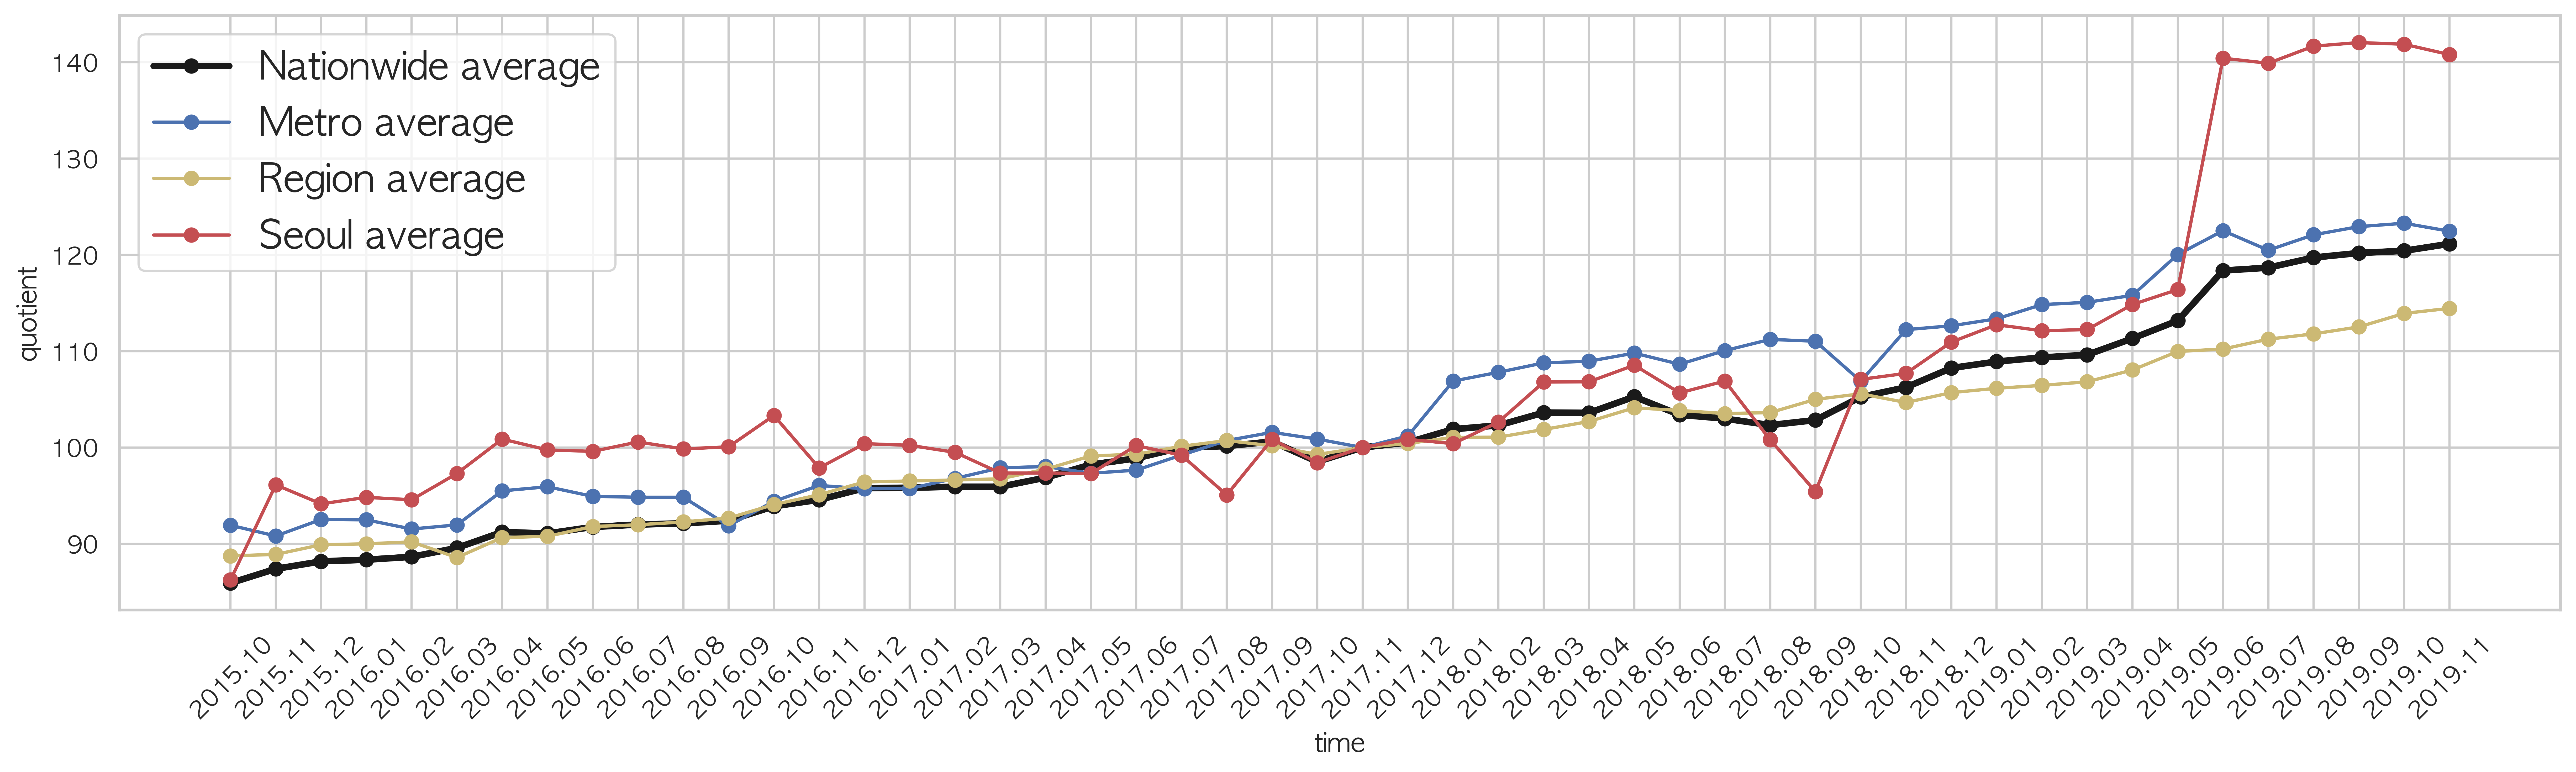

In [92]:
# 평균 분양가
plt.figure(figsize=(20, 5))
plt.plot(df_init_mean['nationwide'], marker='o', c='k',
         linewidth=3, label='Nationwide average')
plt.plot(df_init_mean['metro'], marker='o', c='b', label='Metro average')
plt.plot(df_init_mean['region'], marker='o', c='y', label='Region average')
plt.plot(df_init_mean['seoul'], marker='o', c='r', label='Seoul average')
plt.xlabel('time')
plt.ylabel('quotient')
plt.xticks(rotation=45)

plt.legend(loc=0, fontsize='xx-large')

plt.show()

### 1-3 분양가 지역별 지수상승
- 부동산 대책이 발표된 18년 9월 서울의 지수가 하락하였다가 다시 회복
- 정부정책에 서울이 가장 민감하게 반응

# 거래가

In [130]:
# 2-1. 거래가 지수 데이터 임포트
df_real = pd.read_csv('./dataset/한국감정원_실거래가_임포트용.csv', encoding='euc-kr')
df_real

규모   지역  2015-10  2015-11  2015-12  2016-01  2016-02  2016-03  2016-04  \
0    소형   전국    95.70    95.95    95.40    95.35    95.60    95.45    95.70   
1   중소형   전국    95.70    95.60    95.20    94.90    95.10    94.90    94.90   
2   중대형   전국    93.70    93.80    93.40    93.20    93.50    93.10    93.10   
3    대형   전국    92.90    93.40    92.60    92.80    93.10    93.20    93.00   
4    소형  수도권    88.90    89.25    89.10    89.10    89.25    89.40    90.00   
5   중소형  수도권    91.10    91.20    90.80    90.60    90.70    90.70    90.90   
6   중대형  수도권    91.20    91.10    90.80    90.70    90.70    90.50    90.80   
7    대형  수도권    91.70    92.30    91.30    91.50    91.90    91.50    91.50   
8    소형   지방   100.70   100.70    99.80    99.70   100.10    99.80    99.80   
9   중소형   지방   100.00    99.70    99.10    98.70    99.10    98.70    98.50   
10  중대형   지방    97.20    97.40    96.70    96.50    97.10    96.60    96.60   
11   대형   지방    94.20    94.40    93.90    94.20    94.20    94.90    94.80   
12   소형   서울    81.25    81.95    81.55    81.60    82.05    82.10    83.05   
13  중소형   서울    84.60    84.90    84.60    84.30    84.50    84.50    84.70   
14  중대형   서울    84.50    84.70    84.60    84.40    84.30    84.30    84.70   
15   대형   서울    85.60    86.10    85.90    86.10    85.80    85.30    86.40   

    2016-05  2016-06  2016-07  2016-08  2016-09  2016-10  2016-11  2016-12  \
0     95.85    96.35    97.05    97.90    98.60    99.15    99.30    98.80   
1     94.90    95.30    95.90    96.60    97.40    98.20    98.30    98.20   
2     93.20    93.70    94.10    94.80    95.80    96.60    96.90    96.80   
3     93.00    93.70    94.20    95.00    96.00    96.80    97.10    96.30   
4     90.60    91.75    93.10    94.55    95.60    96.50    96.50    95.95   
5     91.30    91.90    92.80    93.70    94.70    95.80    95.80    95.50   
6     91.20    91.80    92.50    93.30    94.40    95.20    95.40    95.10   
7     91.60    92.40    93.00    94.20    94.50    95.40    95.50    94.90   
8     99.60    99.60    99.75   100.15   100.60   100.90   101.15   100.70   
9     98.20    98.40    98.70    99.20    99.90   100.40   100.60   100.50   
10    96.00    96.50    96.50    97.00    97.80    98.60    98.90    99.00   
11    94.60    95.50    95.80    96.00    97.80    98.30    98.70    97.90   
12    84.15    85.60    87.50    89.00    90.85    91.80    92.15    91.25   
13    85.40    86.40    87.70    88.90    90.10    91.30    91.40    90.90   
14    85.50    86.50    87.50    88.90    89.90    91.00    91.10    90.70   
15    86.40    87.70    88.60    90.30    91.00    92.20    91.40    91.70   

    2017-01  2017-02  2017-03  2017-04  2017-05  2017-06  2017-07  2017-08  \
0     98.50    98.75    98.90    98.95    99.15    99.90   100.80   100.45   
1     97.70    97.90    98.10    97.90    98.20    98.80    99.60    99.80   
2     96.60    96.70    97.00    96.90    97.30    97.90    98.90    99.20   
3     96.10    96.80    97.00    97.10    98.00    98.60    99.10    99.40   
4     95.70    95.65    96.15    96.55    97.20    98.60   100.25   100.20   
5     95.20    95.30    95.70    95.70    96.40    97.50    98.80    99.30   
6     94.90    94.90    95.40    95.40    96.20    97.10    98.50    98.70   
7     94.70    95.30    95.40    95.60    97.00    97.50    98.70    99.10   
8    100.35   100.80   100.75   100.50   100.45   100.55   100.75   100.45   
9     99.80   100.10   100.20    99.90    99.80    99.90   100.20   100.30   
10    98.90    99.00    99.20    99.40    99.10    99.40    99.60   100.00   
11    97.50    98.50    99.00    99.20    99.40   100.50    99.80    99.90   
12    91.10    91.20    91.85    92.10    93.55    95.95    98.90    98.75   
13    90.50    90.70    91.40    91.80    93.20    94.90    97.20    97.90   
14    90.80    90.50    91.70    91.80    93.30    94.90    97.20    97.00   
15    92.00    91.40    92.40    92.80    94.80    96.30    97.80    97.50   

    201

In [131]:
df_real.index = ["Nationwide_s", "Nationwide_sm", "Nationwide_ml", "Nationwide_l", 
                 "Metro_s", "Metro_sm", "Metro_ml", "Metro_l", "Region_s", "Region_sm",
                 "Region_ml", "Region_l", "Seoul_s", "Seoul_sm", "Seoul_ml", "Seoul_l"]
df_real.drop(["규모", "지역"], axis='columns', inplace=True)
df_real.T

Nationwide_s  Nationwide_sm  Nationwide_ml  Nationwide_l  Metro_s  \
2015-10         95.70           95.7           93.7          92.9    88.90   
2015-11         95.95           95.6           93.8          93.4    89.25   
2015-12         95.40           95.2           93.4          92.6    89.10   
2016-01         95.35           94.9           93.2          92.8    89.10   
2016-02         95.60           95.1           93.5          93.1    89.25   
2016-03         95.45           94.9           93.1          93.2    89.40   
2016-04         95.70           94.9           93.1          93.0    90.00   
2016-05         95.85           94.9           93.2          93.0    90.60   
2016-06         96.35           95.3           93.7          93.7    91.75   
2016-07         97.05           95.9           94.1          94.2    93.10   
2016-08         97.90           96.6           94.8          95.0    94.55   
2016-09         98.60           97.4           95.8          96.0    95.60   
2016-10         99.15           98.2           96.6          96.8    96.50   
2016-11         99.30           98.3           96.9          97.1    96.50   
2016-12         98.80           98.2           96.8          96.3    95.95   
2017-01         98.50           97.7           96.6          96.1    95.70   
2017-02         98.75           97.9           96.7          96.8    95.65   
2017-03         98.90           98.1           97.0          97.0    96.15   
2017-04         98.95           97.9           96.9          97.1    96.55   
2017-05         99.15           98.2           97.3          98.0    97.20   
2017-06         99.90           98.8           97.9          98.6    98.60   
2017-07        100.80           99.6           98.9          99.1   100.25   
2017-08        100.45           99.8           99.2          99.4   100.20   
2017-09        100.55          100.0           99.4         100.2   100.35   
2017-10        100.65          100.2          100.0         100.3   100.80   
2017-11        100.00          100.0          100.0         100.0   100.00   
2017-12         99.50           99.7          100.1         100.6   100.00   
2018-01         99.80          100.1          100.9         101.7   100.75   
2018-02         99.80          100.5          101.3         102.3   101.15   
2018-03         99.55          100.4          101.5         102.8   101.30   
2018-04         99.30          100.3          101.6         102.9   101.15   
2018-05         98.60          100.3          101.6         103.1   100.95   
2018-06         98.20          100.2          101.9         102.9   100.85   
2018-07         98.35          100.5          102.7         103.9   101.30   
2018-08         99.70          102.2          105.1         106.1   104.05   
2018-09        100.40          102.5          105.4         107.3   106.05   
2018-10         99.30          101.7          104.6         106.2   105.10   
2018-11         97.95          100.9          103.8         105.6   103.70   
2018-12         97.15          100.1          103.2         104.7   103.20   
2019-01         96.65           99.5          103.2         103.8   102.30   
2019-02         95.95           99.0          102.1         104.1   101.65   
2019-03         95.60           98.7          102.0         103.4   101.10   
2019-04         95.40           98.7          102.2         105.0   101.00   
2019-05         95.40           99.1          103.0         105.0   101.70   
2019-06         96.00          100.0          104.9         107.7   102.80   
2019-07         95.90          100.6          105.1         107.7   103.30   
2019-08         95.95          100.9          105.6         108.3   103.70   
2019-09         95.90          101.5          106.3         108.0   103.80   
2019-10         96.70          102.3          107.6         109.9   104.95   
2019-11         97.85          104.1          109.6         111.7   106.40   

         Metro_sm  Metro_ml  M

In [107]:
# 2-2. 사이즈별로 데이터프레임 분리

df_small_real = pd.DataFrame(
    df_real.T[['Nationwide_s', 'Metro_s', 'Region_s', 'Seoul_s']])
df_smd_real = pd.DataFrame(
    df_real.T[['Nationwide_sm', 'Metro_sm', 'Region_sm', 'Seoul_sm']])
df_midl_real = pd.DataFrame(
    df_real.T[['Nationwide_ml', 'Metro_ml', 'Region_ml', 'Seoul_ml']])
df_large_real = pd.DataFrame(
    df_real.T[['Nationwide_l', 'Metro_l', 'Region_l', 'Seoul_l']])

In [26]:
# 2-2. 사이즈별로 데이터프레임 분리

df_small_real = pd.DataFrame(
    [df_real['Nationwide_s'], df_real['Metro_s'], df_real['Region_s'], df_real['Seoul_s']])
df_smd_real = pd.DataFrame(
    [df_real['Nationwide_sm'], df_real['Metro_sm'], df_real['Region_sm'], df_real['Seoul_sm']])
df_midl_real = pd.DataFrame(
    [df_real['Nationwide_ml'], df_real['Metro_ml'], df_real['Region_ml'], df_real['Seoul_ml']])
df_large_real = pd.DataFrame(
    [df_real['Nationwide_l'], df_real['Metro_l'], df_real['Region_l'], df_real['Seoul_l']])

df_small_real, df_smd_real, df_midl_real, df_large_real = df_small_real.T, df_smd_real.T, df_midl_real.T, df_large_real.T

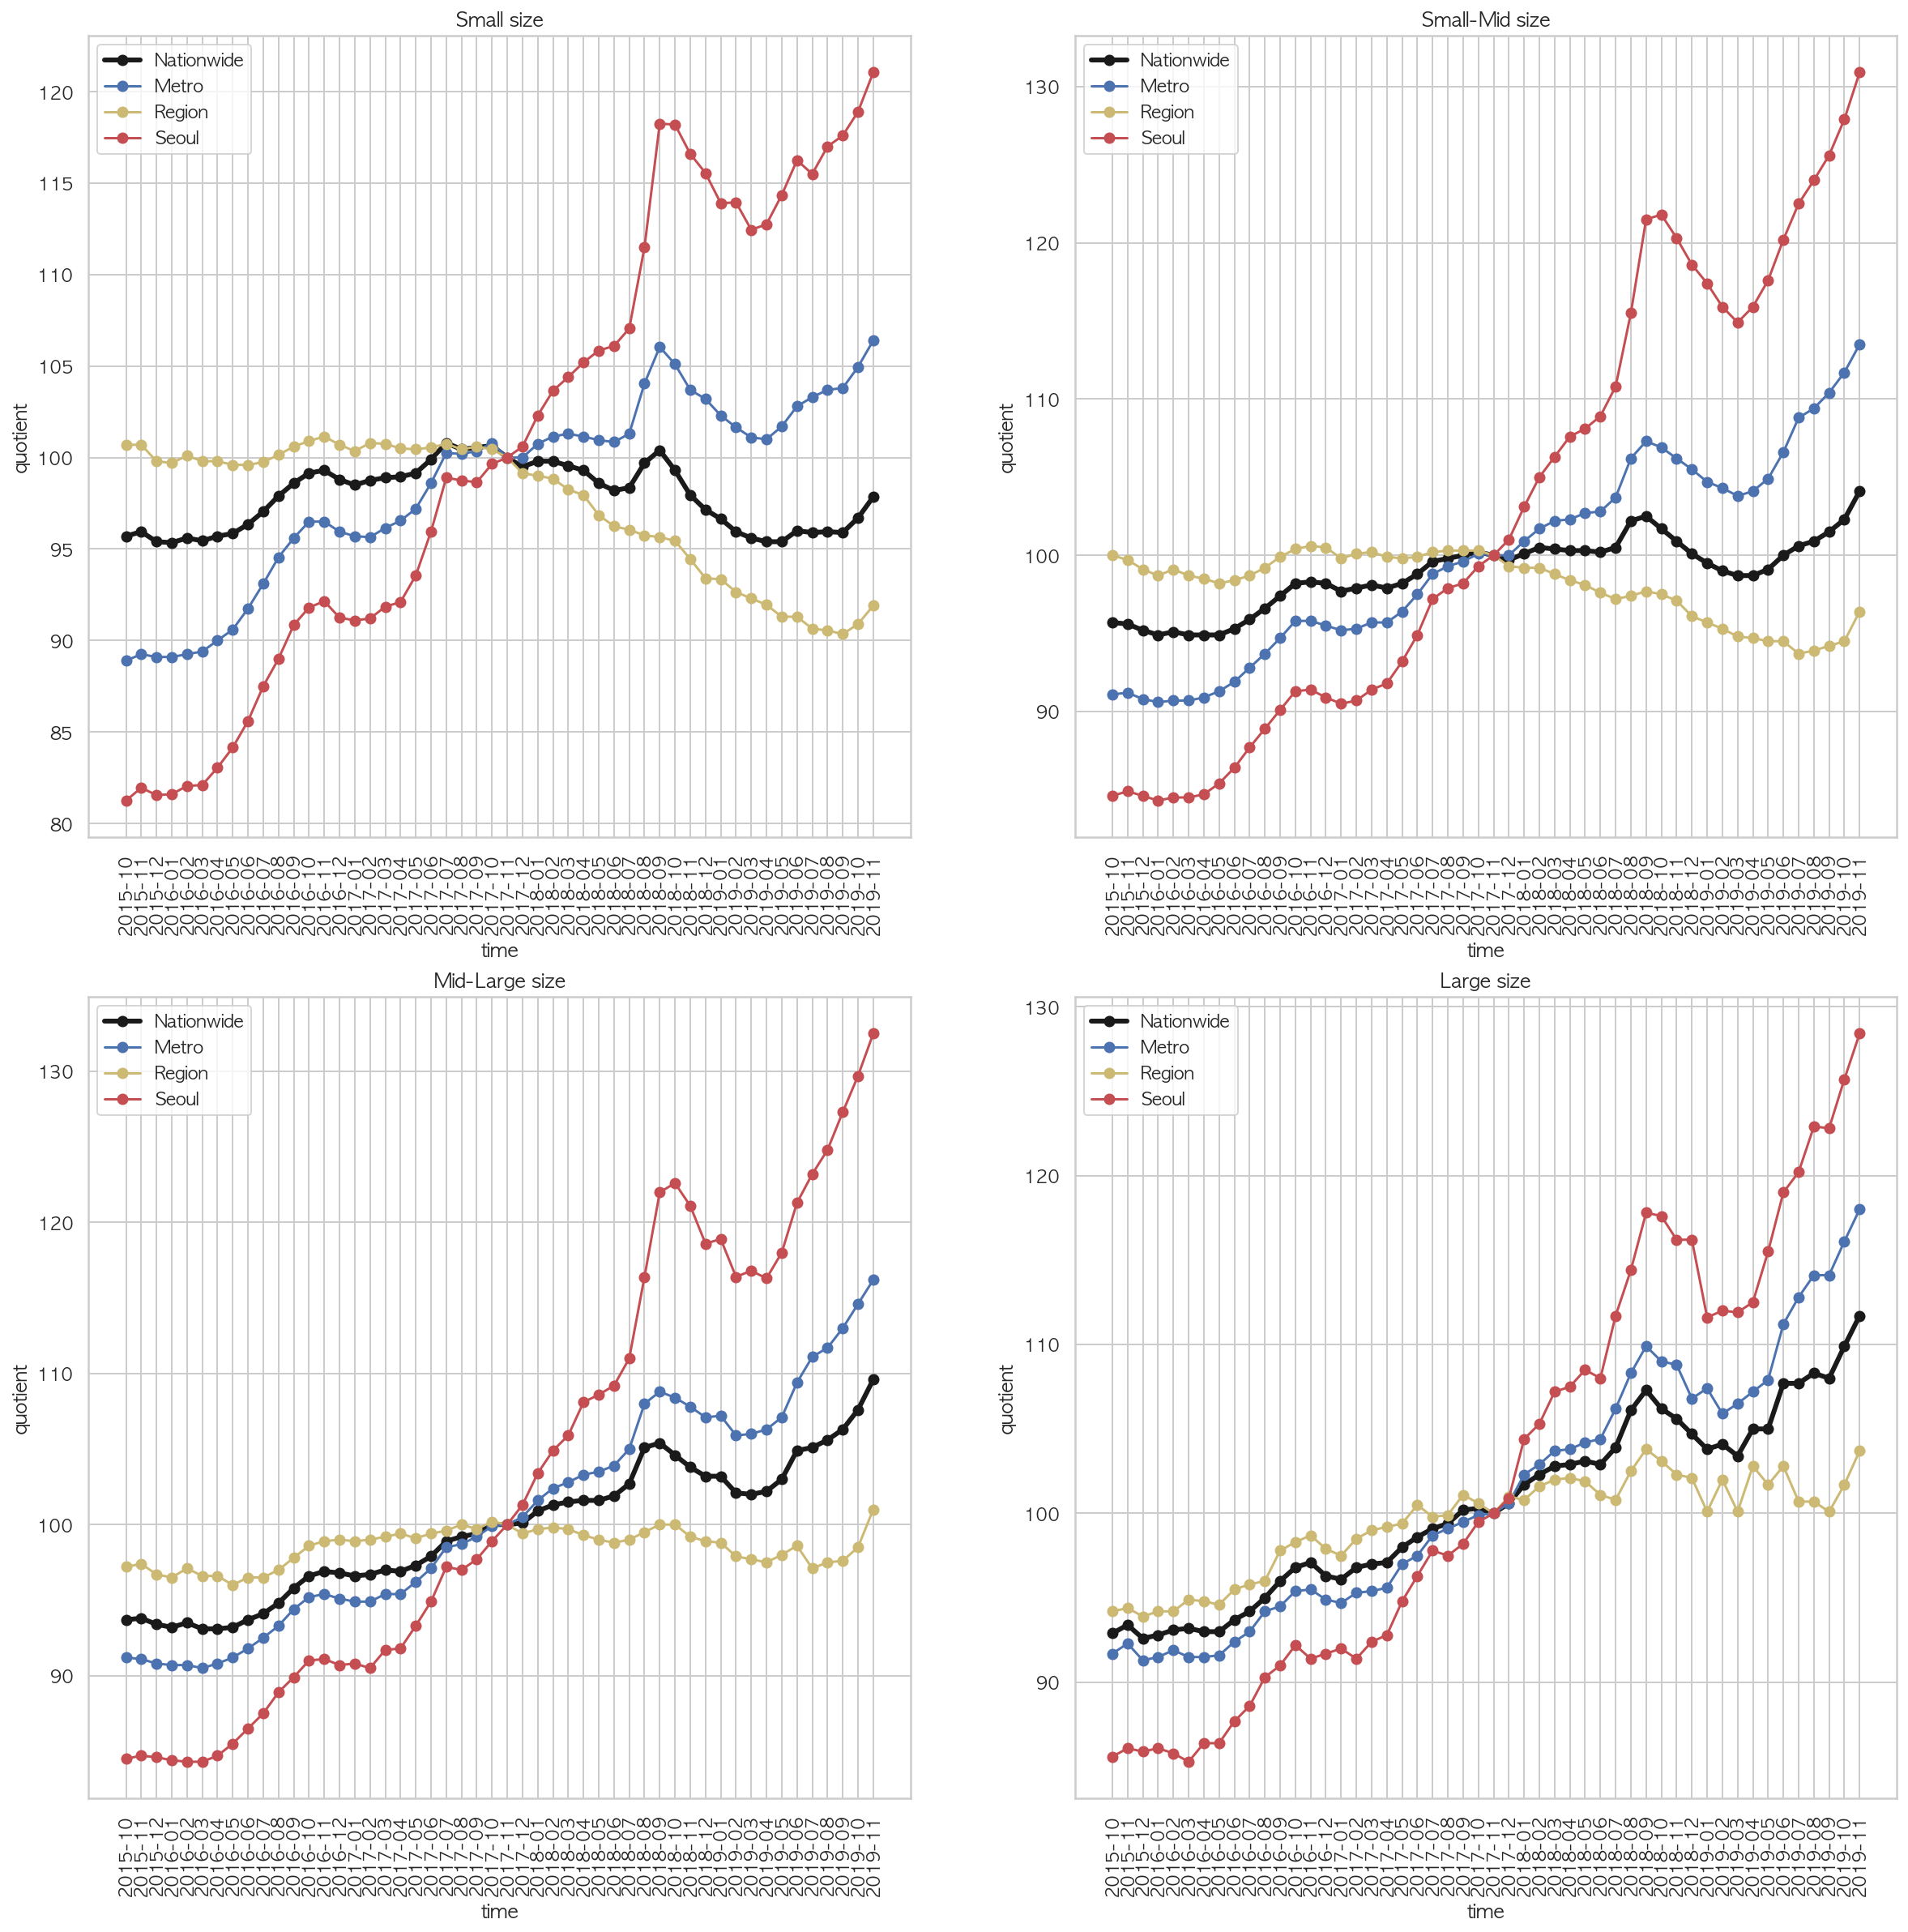

In [110]:
plt.figure(figsize=(20, 20))

plt.subplot(221)

plt.plot(df_small_real['Nationwide_s'], marker='o', c='k', linewidth=3, label='Nationwide')
plt.plot(df_small_real['Metro_s'], marker='o', c='b', label='Metro')
plt.plot(df_small_real['Region_s'], marker='o',c='y', label='Region')
plt.plot(df_small_real['Seoul_s'], marker='o', c='r', label='Seoul')
plt.xlabel('time')
plt.ylabel('quotient')
plt.xticks(rotation=90)
plt.title('Small size')
plt.legend()


plt.subplot(222)

plt.plot(df_smd_real['Nationwide_sm'], marker='o', c='k', linewidth=3, label='Nationwide')
plt.plot(df_smd_real['Metro_sm'], marker='o', c='b', label='Metro')
plt.plot(df_smd_real['Region_sm'], marker='o',c='y', label='Region')
plt.plot(df_smd_real['Seoul_sm'], marker='o', c='r', label='Seoul')
plt.xlabel('time')
plt.ylabel('quotient')
plt.xticks(rotation=90)
plt.title('Small-Mid size')
plt.legend()


plt.subplot(223)

plt.plot(df_midl_real['Nationwide_ml'], marker='o', c='k', linewidth=3, label='Nationwide')
plt.plot(df_midl_real['Metro_ml'], marker='o', c='b', label='Metro')
plt.plot(df_midl_real['Region_ml'], marker='o',c='y', label='Region')
plt.plot(df_midl_real['Seoul_ml'], marker='o', c='r', label='Seoul')
plt.xlabel('time')
plt.ylabel('quotient')
plt.xticks(rotation=90)
plt.title('Mid-Large size')
plt.legend()


plt.subplot(224)

plt.plot(df_large_real['Nationwide_l'], marker='o', c='k', linewidth=3, label='Nationwide')
plt.plot(df_large_real['Metro_l'], marker='o', c='b', label='Metro')
plt.plot(df_large_real['Region_l'], marker='o',c='y', label='Region')
plt.plot(df_large_real['Seoul_l'], marker='o', c='r', label='Seoul')
plt.xlabel('time')
plt.ylabel('quotient')
plt.xticks(rotation=90)
plt.title('Large size')
plt.legend()

plt.show()

### 2-1. 거래가 사이즈별 지수 데이터
- 기준: 2017년 11월
- 분류: 소형, 중소형, 중대형, 대형
    - 소형, 중소형
        - 지방: 17년 11월 이후 꾸준한 하락세, 과잉공급, 비인기, 중대형, 대형 인기

In [121]:
# 2-3. (규모 불문)지역별 지수 상승세 비교

nw_real_mean = (df_real.T['Nationwide_s'] + df_real.T['Nationwide_sm'] +
                df_real.T['Nationwide_ml'] + df_real.T['Nationwide_l']) / 4
me_real_mean = (df_real.T['Metro_s'] + df_real.T['Metro_sm'] +
                df_real.T['Metro_ml'] + df_real.T['Metro_l']) / 4
re_real_mean = (df_real.T['Region_s'] + df_real.T['Region_sm'] +
                df_real.T['Region_ml'] + df_real.T['Region_l']) / 4
se_real_mean = (df_real.T['Seoul_s'] + df_real.T['Seoul_sm'] +
                df_real.T['Seoul_ml'] + df_real.T['Seoul_l']) / 4

df_real_mean = pd.DataFrame(
    [nw_real_mean, me_real_mean, re_real_mean, se_real_mean])

df_real_mean = df_real_mean.T
df_real_mean.columns = ['nationwide_r', 'metro_r', 'region_r', 'seoul_r']

In [122]:
df_real_mean

nationwide_r   metro_r  region_r   seoul_r
2015-10       94.5000   90.7250   98.0250   83.9875
2015-11       94.6875   90.9625   98.0500   84.4125
2015-12       94.1500   90.5000   97.3750   84.1625
2016-01       94.0625   90.4750   97.2750   84.1000
2016-02       94.3250   90.6375   97.6250   84.1625
2016-03       94.1625   90.5250   97.5000   84.0500
2016-04       94.1750   90.8000   97.4250   84.7125
2016-05       94.2375   91.1750   97.1000   85.3625
2016-06       94.7625   91.9625   97.5000   86.5500
2016-07       95.3125   92.8500   97.6875   87.8250
2016-08       96.0750   93.9375   98.0875   89.2750
2016-09       96.9500   94.8000   99.0250   90.4625
2016-10       97.6875   95.7250   99.5500   91.5750
2016-11       97.9000   95.8000   99.8375   91.5125
2016-12       97.5250   95.3625   99.5250   91.1375
2017-01       97.2250   95.1250   99.1375   91.1000
2017-02       97.5375   95.2875   99.6000   90.9500
2017-03       97.7500   95.6625   99.7875   91.8375
2017-04       97.7125   95.8125   99.7500   92.1250
2017-05       98.1625   96.7000   99.6875   93.7125
2017-06       98.8000   97.6750  100.0875   95.5125
2017-07       99.6000   99.0625  100.0875   97.7750
2017-08       99.7125   99.3250  100.1625   97.7875
2017-09      100.0375   99.6625  100.4250   98.1875
2017-10      100.2875  100.1750  100.3875   99.3375
2017-11      100.0000  100.0000  100.0000  100.0000
2017-12       99.9750  100.2750   99.7125  100.9500
2018-01      100.6250  101.3875   99.6750  103.3000
2018-02      100.9750  102.0375   99.8625  104.7125
2018-03      101.0625  102.5000   99.6875  105.9500
2018-04      101.0250  102.6375   99.4375  107.1000
2018-05      100.9000  102.8375   98.9625  107.7625
2018-06      100.8000  102.9875   98.4375  108.0500
2018-07      101.3625  104.0500   98.2625  110.1375
2018-08      103.2750  106.6375   98.7875  114.4500
2018-09      103.9000  108.0125   99.2875  119.8875
2018-10      102.9500  107.3500   99.0125  120.0500
2018-11      102.0625  106.6250   98.2625  118.5500
2018-12      101.2875  105.6500   97.6250  117.2375
2019-01      100.7875  105.4000   96.9875  115.4500
2019-02      100.2875  104.4375   96.9625  114.5625
2019-03       99.9250  104.3500   96.2250  114.0125
2019-04      100.3250  104.6500   96.7375  114.3625
2019-05      100.6250  105.4000   96.3750  116.3625
2019-06      102.1500  107.5000   96.8000  119.1875
2019-07      102.3250  109.0000   95.5375  120.3500
2019-08      102.6875  109.7250   95.6625  122.1750
2019-09      102.9250  110.3250   95.5625  123.3250
2019-10      104.1250  111.8375   96.4000  125.5500
2019-11      105.8125  113.5250   98.2500  128.2125

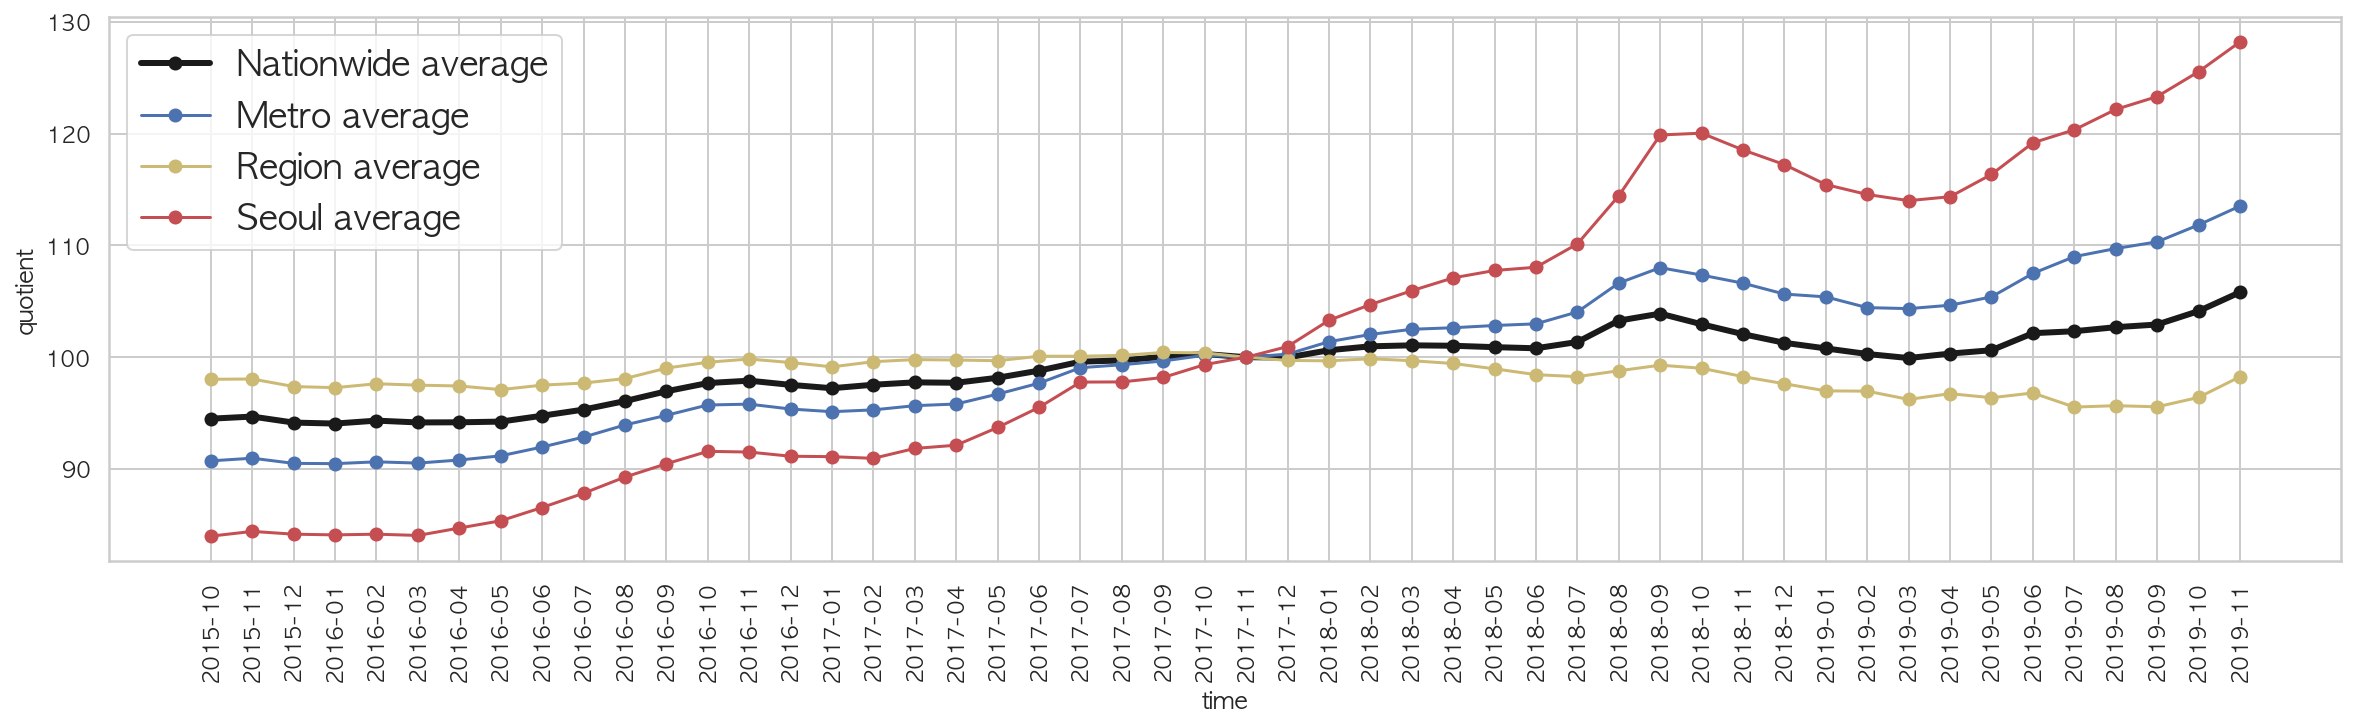

In [132]:
plt.figure(figsize=(20, 5))
plt.plot(df_real_mean['nationwide_r'], marker='o', c='k', linewidth=3, label='Nationwide average')
plt.plot(df_real_mean['metro_r'], marker='o', c='b', label='Metro average')
plt.plot(df_real_mean['region_r'], marker='o',c='y', label='Region average')
plt.plot(df_real_mean['seoul_r'], marker='o',c='r', label='Seoul average')
plt.xlabel('time')
plt.ylabel('quotient')
plt.xticks(rotation=90)
plt.legend(loc=0, fontsize='xx-large')

plt.show()

### 2-3. 지역별 지수 데이터
- 지방: 소형, 중소형의 영향으로 전국 평균 아래인 것으로 파악

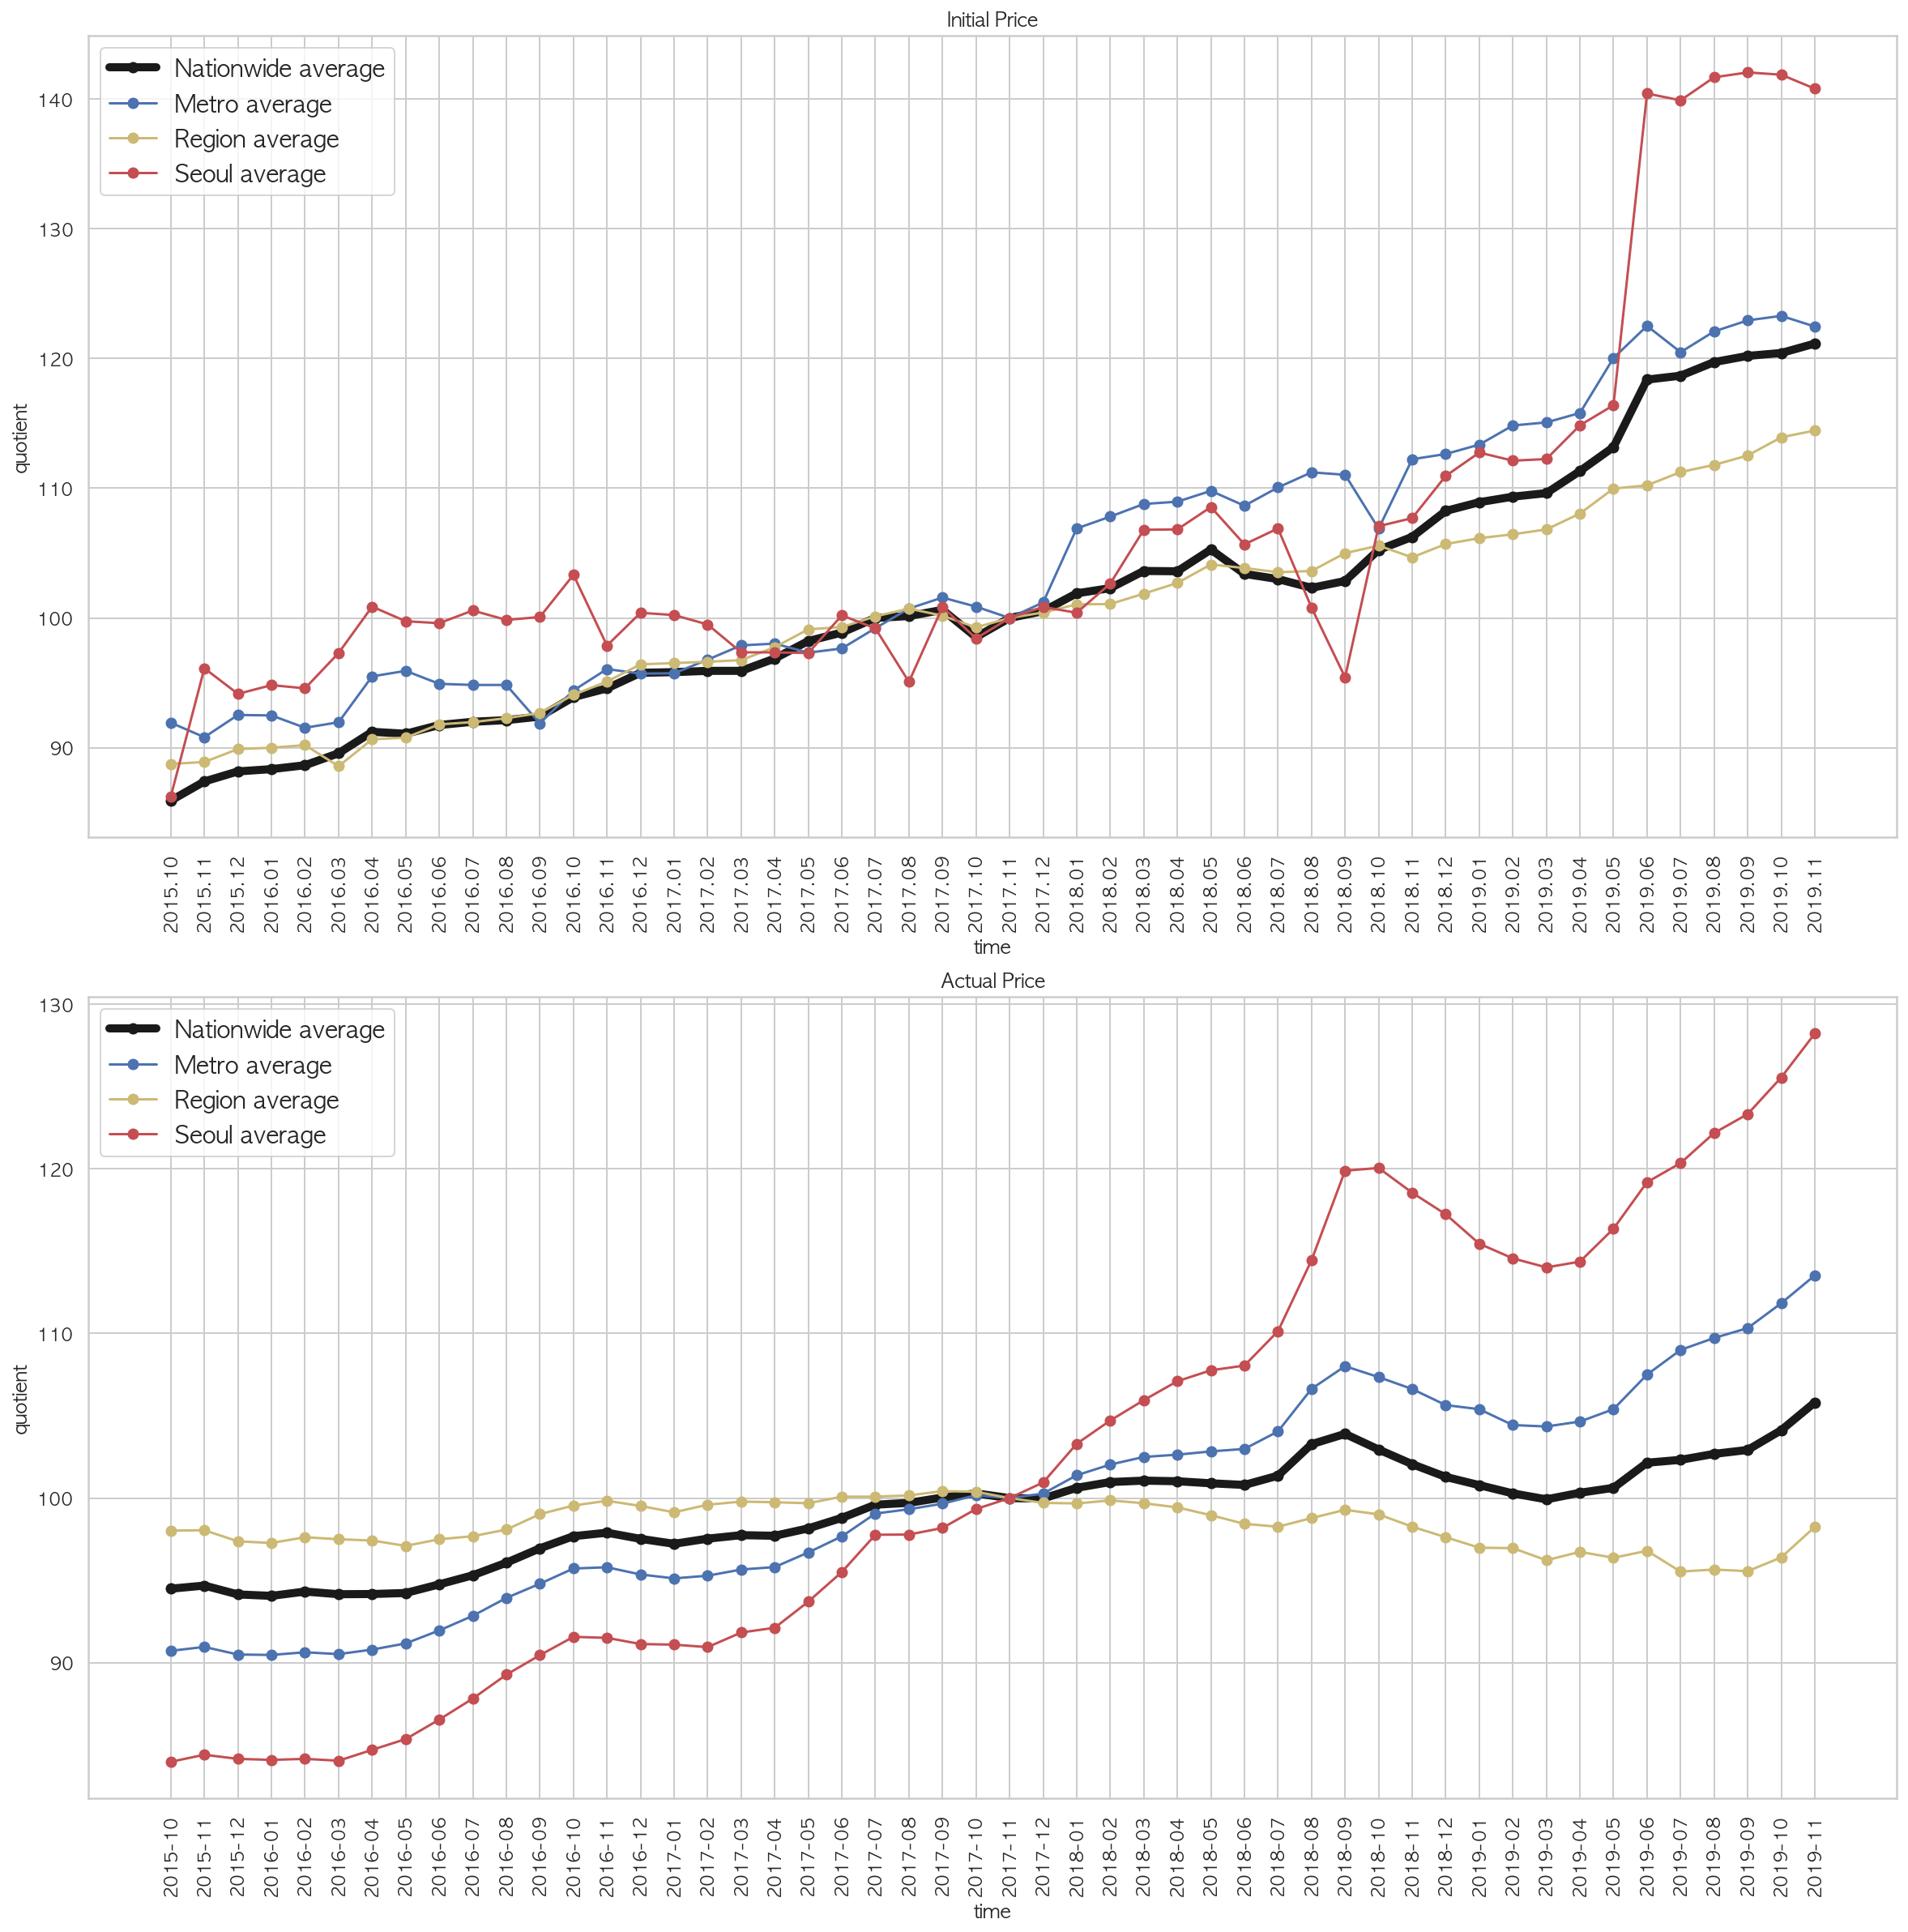

In [124]:
# 3. 분양가 지수, 거래가 지수 평균 비교

# 분양가

plt.figure(figsize=(20, 20))

plt.subplot(211)
plt.plot(df_init_mean['nationwide'], marker='o', c='k',
         linewidth=5, label='Nationwide average')
plt.plot(df_init_mean['metro'], marker='o', c='b', label='Metro average')
plt.plot(df_init_mean['region'], marker='o', c='y', label='Region average')
plt.plot(df_init_mean['seoul'], marker='o', c='r', label='Seoul average')
plt.xlabel('time')
plt.ylabel('quotient')
plt.xticks(rotation=90)
plt.legend(fontsize='x-large')
plt.title("Initial Price")

plt.subplot(212)
plt.plot(df_real_mean['nationwide_r'], marker='o',
         c='k', linewidth=5, label='Nationwide average')
plt.plot(df_real_mean['metro_r'], marker='o', c='b', label='Metro average')
plt.plot(df_real_mean['region_r'], marker='o', c='y', label='Region average')
plt.plot(df_real_mean['seoul_r'], marker='o', c='r', label='Seoul average')
plt.xlabel('time')
plt.ylabel('quotient')
plt.xticks(rotation=90)
plt.legend(fontsize='x-large')
plt.title("Actual Price")

plt.show()

### 3. 분양가, 거래가 지수 평균 비교
- 서울: 분양가 19년 7월 급격한 상승
- 수치 기준: 서울 분양가의 상승폭이 실거래가의 상승폭에 미치지 못하는 것으로 파악
- 2017년 이전 서울의 초기 분양가는 타지역에 비해 높지만 실거래가는 타지역에 비해 낮음
- 2018년 9월 이후 분양가와 실거래가격은 양의 상관관계를 보임

#### 가설 1. 분양가격과 실제 아파트의 가격은 깊은 관계가 있다. 
*1-1 서울*
- 2017년 11월 이전 서울의 분양가는 타지역에 비해 높음
- 2017년 11월 이전 서울의 거래가는 타지역에 비해 낮음
- 2017년 11월 이후 서울의 분양가는 타지역과 비슷하다 2019년 5월 큰폭으로 상승함
- 2017년 11월 이후 서울의 거래가는 타지역보다 높음

*1-2 수도권*
- 2017년 11월 이전 수도권의 분양가는 타지역에 비해 높음
- 2017년 11월 이전 수도권의 거래가는 타지역에 비해 낮음
- 2017년 11월 이후 수도권의 분양가는 타지역에 비해 높음
- 2017년 11월 이후 수도권의 거래가는 타지역보다 높지만 서울보다는 낮음

*1-3 지방*
- 2017년 11월 이전 지방의 분양가는 타지역에 비해 낮음
- 2017년 11월 이전 지방의 거래가는 타지역에 비해 높음
- 2017년 11월 이후 지방의 분양가는 타지역에 비해 낮음
- 2017년 11월 이후 지방의 거래가는 평균보다 낮아짐

In [134]:
nw_coe = np.corrcoef(df_init_mean['nationwide'], df_real_mean['nationwide_r'])
me_coe = np.corrcoef(df_init_mean['metro'], df_real_mean['metro_r'])
lo_coe = np.corrcoef(df_init_mean['region'], df_real_mean['region_r'])
se_coe = np.corrcoef(df_init_mean['seoul'], df_real_mean['seoul_r'])

In [135]:
nw_coe, me_coe, lo_coe, se_coe

(array([[1.        , 0.87685455],
        [0.87685455, 1.        ]]), array([[1.        , 0.94889456],
        [0.94889456, 1.        ]]), array([[ 1.        , -0.30339843],
        [-0.30339843,  1.        ]]), array([[1.        , 0.77373351],
        [0.77373351, 1.        ]]))

In [136]:
#분양가-거래가 상관관계: 피어슨 상관계수 도출
# 서울, 수도권, 지방, 전국 순

se_coe[0, 1], me_coe[0, 1], lo_coe[0, 1], nw_coe[0, 1]

(0.773733508809496, 0.948894562068937, -0.3033984292324676, 0.876854550228283)

### 분양가 - 거래가 상관관계 
- 수도권: 밀접
- 지방: 소형, 중소형의 영향으로 가장 없음

In [154]:
# 4. 실제 가격 확인
df_trend = pd.read_csv('./dataset/price_trend.csv', encoding='utf-8')
df_trend

시도  201701  201702  201703  201704  201705  201706  201707  201708  \
0   서울_강남3구   822.6   823.8   827.2   831.1   841.2   860.9   873.0   896.8   
1    서울_마용성   594.9   596.5   601.4   604.0   609.8   617.3   624.3   636.5   
2    서울_서남부   457.0   457.8   459.1   461.7   464.2   469.1   474.8   485.2   
3    서울_동북부   430.1   430.7   431.7   433.1   436.9   442.5   445.1   452.6   
4    서울_서북부   467.7   469.2   472.6   473.9   477.0   480.6   484.6   489.6   
5        인천   232.3   232.6   233.0   233.2   233.7   234.7   235.4   237.1   
6        부산   244.2   245.7   247.3   249.0   250.6   252.1   253.2   254.6   
7        대구   248.7   248.5   248.4   248.5   248.6   249.2   249.7   252.2   
8        광주   186.2   187.7   187.9   188.1   188.7   188.9   189.6   190.3   
9        대전   193.8   194.1   194.6   194.9   195.1   195.2   195.3   195.8   
10       울산   232.6   232.5   232.7   232.2   232.4   232.6   232.5   232.3   
11       세종   236.1   235.1   236.5   237.8   240.3   247.7   257.6   262.6   
12    경기_북부   239.7   240.2   240.6   241.1   241.8   243.4   244.1   245.1   
13    경기_남부   280.3   280.6   281.1   281.6   282.3   283.8   285.5   288.0   
14      강원도   137.9   138.2   138.5   139.0   139.2   139.4   140.1   140.8   
15       충북   159.2   159.2   159.1   159.2   159.1   159.2   159.1   158.4   
16       충남   147.6   147.7   147.5   147.5   147.4   147.5   147.4   147.7   
17       전북   131.1   131.4   131.5   131.7   131.9   132.0   132.2   132.4   
18       전남   122.1   122.7   123.2   123.9   124.5   125.0   125.8   126.1   
19       경북   149.3   149.1   148.9   148.8   148.5   148.9   149.1   148.9   
20       경남   187.2   187.1   187.0   186.9   187.4   187.4   186.9   186.5   
21       제주   300.8   302.2   303.1   302.3   305.4   305.5   305.9   306.9   
22       전국   281.9   282.4   283.3   284.1   285.7   288.3   290.5   293.9   

    201709  201710  201711  201712  201801  201802  201803  201804  201805  \
0    899.1   910.0   924.9   941.8   971.6  1002.3  1042.6  1064.9  1075.4   
1    641.7   646.8   656.7   664.4   679.7   694.7   718.6   739.9   750.3   
2    488.7   493.7   497.5   502.1   508.5   513.5   524.4   536.3   543.9   
3    451.4   455.2   460.0   463.2   468.8   475.0   486.2   492.8   499.0   
4    491.4   497.7   500.8   503.6   506.4   509.9   519.8   527.7   532.5   
5    237.8   238.4   238.9   239.6   240.1   240.3   240.5   240.8   241.0   
6    255.8   256.8   257.6   257.8   258.4   258.7   258.8   259.0   258.7   
7    254.9   256.9   259.0   260.0   261.6   262.4   264.5   267.0   268.5   
8    191.0   191.7   192.9   194.0   196.0   196.5   197.1   198.5   199.7   
9    196.2   196.7   197.1   197.6   198.3   198.5   198.5   199.3   199.5   
10   232.0   231.6   231.0   229.8   229.3   229.0   228.3   225.7   224.3   
11   261.9   264.1   265.3   265.5   266.4   267.9   270.2   272.1   273.2   
12   245.9   246.5   247.5   248.3   248.7   249.2   250.0   251.4   252.0   
13   289.1   290.4   291.4   292.4   294.7   296.6   298.8   299.4   300.2   
14   141.5   143.4   143.9   144.6   144.9   145.1   145.5   146.3   146.8   
15   157.9   157.3   157.0   156.7   156.5   156.3   156.4   156.2   155.7   
16   147.4   147.4   147.4   147.3   147.3   147.3   147.9   148.1   147.6   
17   132.5   132.9   133.2   133.8   134.0   134.2   134.8   135.0   134.7   
18   127.4   128.4   129.0   129.5   130.0   130.8   131.6   133.1   133.9   
19   148.6   148.0   147.8   147.4   147.2   146.9   146.6   145.8   145.4   
20   185.8   185.3   184.8   183.8   183.3   182.9   182.1   180.2   179.2   
21   308.6   308.7   308.3   311.5   312.7   312.8   312.0   311.4   311.5   
22   294.8   296.7   298.7   300.7   303.8   306.9   311.6   315.0   317.0   

    201806  201807  201808  201809  201810  201811  201812  201901  201902  \
0   1079.8  1086.5  1102.3  1147.1  1175.4  1182.5  1192.6  1188.2  1181.7   
1    760.4   774.0   788.4   824.9   843.6   853.5   858.1   860.0   860.1   
2    

In [155]:
df_trend.index = ["서울_강남3구", "서울_마용성", "서울_서남부", "서울_동북부", "서울_서북부", 
                  "인천", "부산", "대구", "광주", "대전", "울산", "세종", "경기_북부", 
                  "경기_남부", "강원도", "충북", "충남", "전북", "전남", "경북", "경남", 
                  "제주", "전국"]
df_trend.drop(["시도"], axis='columns', inplace=True)
df_trend.T

서울_강남3구  서울_마용성  서울_서남부  서울_동북부  서울_서북부     인천     부산     대구     광주  \
201701    822.6   594.9   457.0   430.1   467.7  232.3  244.2  248.7  186.2   
201702    823.8   596.5   457.8   430.7   469.2  232.6  245.7  248.5  187.7   
201703    827.2   601.4   459.1   431.7   472.6  233.0  247.3  248.4  187.9   
201704    831.1   604.0   461.7   433.1   473.9  233.2  249.0  248.5  188.1   
201705    841.2   609.8   464.2   436.9   477.0  233.7  250.6  248.6  188.7   
201706    860.9   617.3   469.1   442.5   480.6  234.7  252.1  249.2  188.9   
201707    873.0   624.3   474.8   445.1   484.6  235.4  253.2  249.7  189.6   
201708    896.8   636.5   485.2   452.6   489.6  237.1  254.6  252.2  190.3   
201709    899.1   641.7   488.7   451.4   491.4  237.8  255.8  254.9  191.0   
201710    910.0   646.8   493.7   455.2   497.7  238.4  256.8  256.9  191.7   
201711    924.9   656.7   497.5   460.0   500.8  238.9  257.6  259.0  192.9   
201712    941.8   664.4   502.1   463.2   503.6  239.6  257.8  260.0  194.0   
201801    971.6   679.7   508.5   468.8   506.4  240.1  258.4  261.6  196.0   
201802   1002.3   694.7   513.5   475.0   509.9  240.3  258.7  262.4  196.5   
201803   1042.6   718.6   524.4   486.2   519.8  240.5  258.8  264.5  197.1   
201804   1064.9   739.9   536.3   492.8   527.7  240.8  259.0  267.0  198.5   
201805   1075.4   750.3   543.9   499.0   532.5  241.0  258.7  268.5  199.7   
201806   1079.8   760.4   548.9   504.3   538.1  240.9  258.7  269.3  201.4   
201807   1086.5   774.0   556.8   511.3   546.8  241.0  259.2  271.1  203.2   
201808   1102.3   788.4   566.9   517.5   553.8  241.1  258.8  272.1  204.4   
201809   1147.1   824.9   596.5   541.6   569.0  241.4  259.0  273.6  207.4   
201810   1175.4   843.6   617.9   558.0   585.2  241.9  259.0  274.9  210.4   
201811   1182.5   853.5   627.2   565.2   591.8  242.3  258.5  276.1  213.6   
201812   1192.6   858.1   630.7   568.1   596.9  242.3  258.1  277.4  217.1   
201901   1188.2   860.0   633.2   570.3   599.5  242.8  257.7  278.8  219.0   
201902   1181.7   860.1   633.8   572.7   600.6  243.3  257.6  279.9  220.3   
201903   1174.8   860.1   634.0   572.3   602.6  243.7  257.3  280.1  221.7   
201904   1168.9   862.5   634.1   572.7   605.4  243.5  256.1  280.6  222.6   
201905   1169.6   862.3   634.7   573.5   607.3  243.6  256.1  280.6  226.0   
201906   1174.3   864.1   635.6   575.3   607.8  243.5  255.0  281.4  226.7   
201907   1200.2   875.2   639.8   580.1   611.2  243.3  255.8  281.9  227.5   
201908   1216.4   882.5   643.7   585.2   615.4  243.6  255.3  282.4  228.5   
201909   1224.0   894.8   649.8   593.0   622.4  244.0  255.2  282.9  231.5   
201910   1250.0   905.5   657.9   599.8   627.2  244.1  254.9  283.4  231.5   
201911   1246.6   916.9   667.7   606.8   633.9  244.9  255.4  284.4  231.6   
201912   1281.1   938.3   682.1   610.1   643.3  245.8  258.5  285.3  232.4   
202001   1295.9   951.8   693.5   620.5   650.6  246.6  261.2  287.8  232.7   

           대전     울산     세종  경기_북부  경기_남부    강원도     충북     충남     전북     전남  \
201701  193.8  232.6  236.1  239.7  280.3  137.9  159.2  147.6  131.1  122.1   
201702  194.1  232.5  235.1  240.2  280.6  138.2  159.2  147.7  131.4  122.7   
201703  194.6  232.7  236.5  240.6  281.1  138.5  159.1  147.5  131.5  123.2   
201704  194.9  232.2  237.8  241.1  281.6  139.0  159.2  147.5  131.7  123.9   
201705  195.1  232.4  240.3  241.8  282.3  139.2  159.1  147.4  131.9  124.5   
201706  195.2  232.6  247.7  243.4  283.8  139.4  159.2  147.5  132.0  125.0   
201707  195.3  232.5  257.6  244.1  285.5  140.1  159.1  147.4  132.2  125.8   
201708  195.8  232.3  262.6  245.1  288.0  140.8  158.4  147.7  132.4  126.1   
201709  196.2  232.0  261.9  245.9  289.1  141.5  157.9  147.4  132.5  127.4   
201710  196.7  231.6  264.1  246.5  290.4  143.4  157.3  147.4  132.9  128.4   
201711  197.1  231.0  265.3  247.5  291.4  143.9  157.0  147.4  133.2  129.0   
201712  197.6  229.8  265.5  248.3  292.4  14

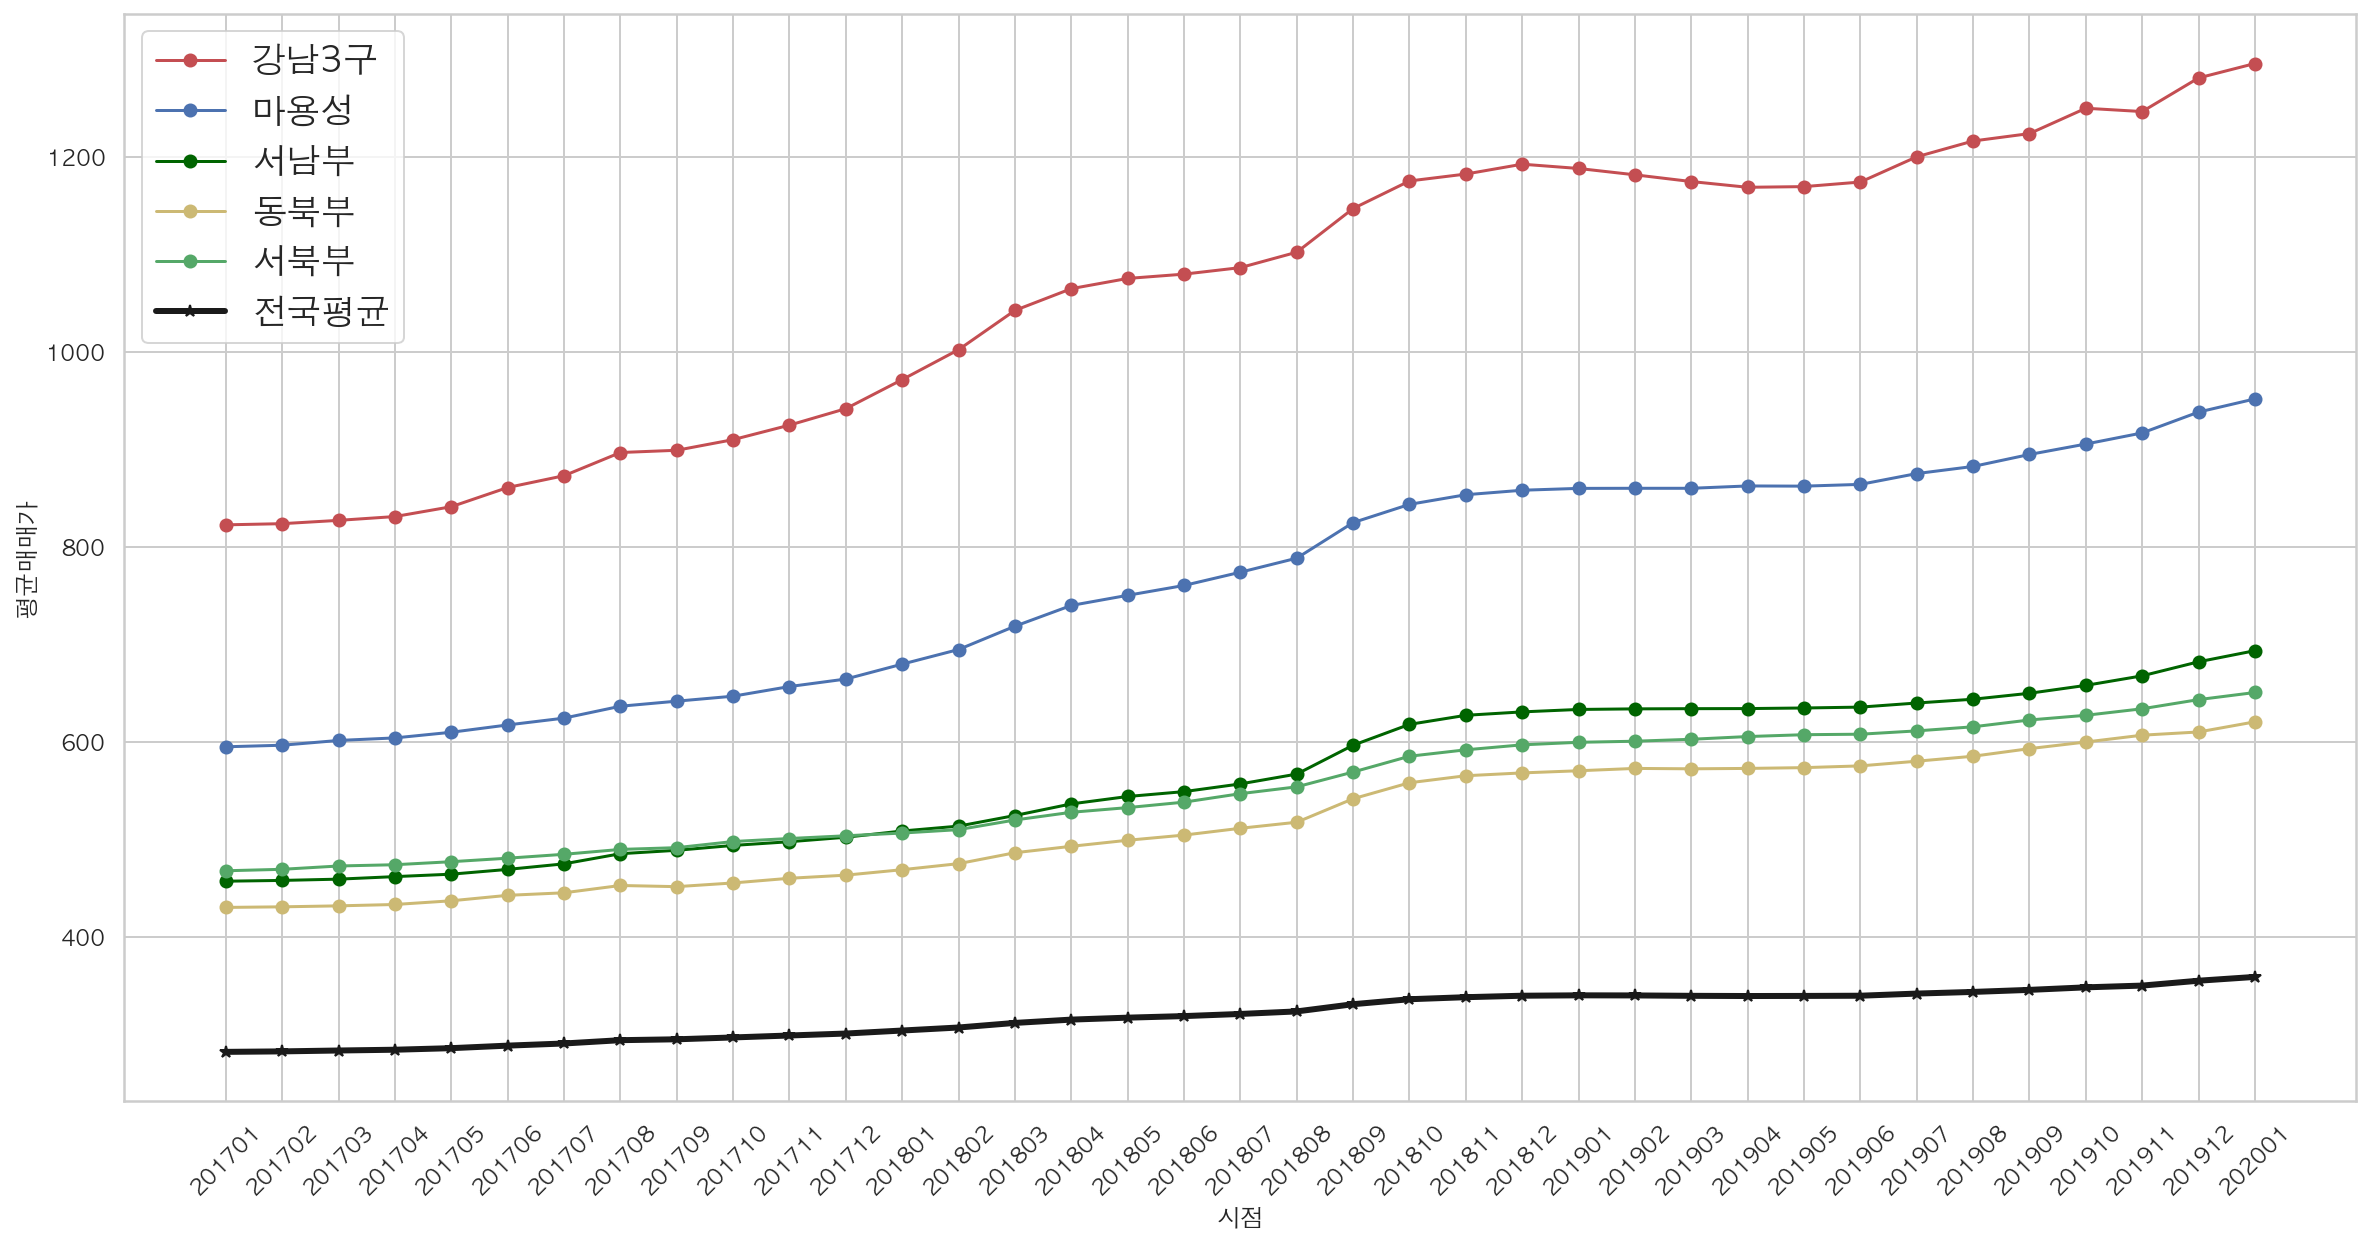

In [156]:
# 서울 평균 시세 비교

plt.figure(figsize=(20, 10))
plt.plot(df_trend.T['서울_강남3구'], marker='o', c='r', label='강남3구')
plt.plot(df_trend.T['서울_마용성'], marker='o', c='b', label='마용성')
plt.plot(df_trend.T['서울_서남부'], marker='o', c='darkgreen', label='서남부')
plt.plot(df_trend.T['서울_동북부'], marker='o', c='y', label='동북부')
plt.plot(df_trend.T['서울_서북부'], marker='o', c='g', label='서북부')
plt.plot(df_trend.T['전국'], marker='*', c='k', linewidth=3, label='전국평균')

plt.xlabel('시점')
plt.ylabel('평균매매가')
plt.xticks(rotation=45)
plt.legend(loc=0, fontsize='xx-large')

plt.show()

### 4. 서울 실제 가격
- 강남 3구: 전국 평균의 3배 이상
- 마용성: 전국평균의 2배 이상

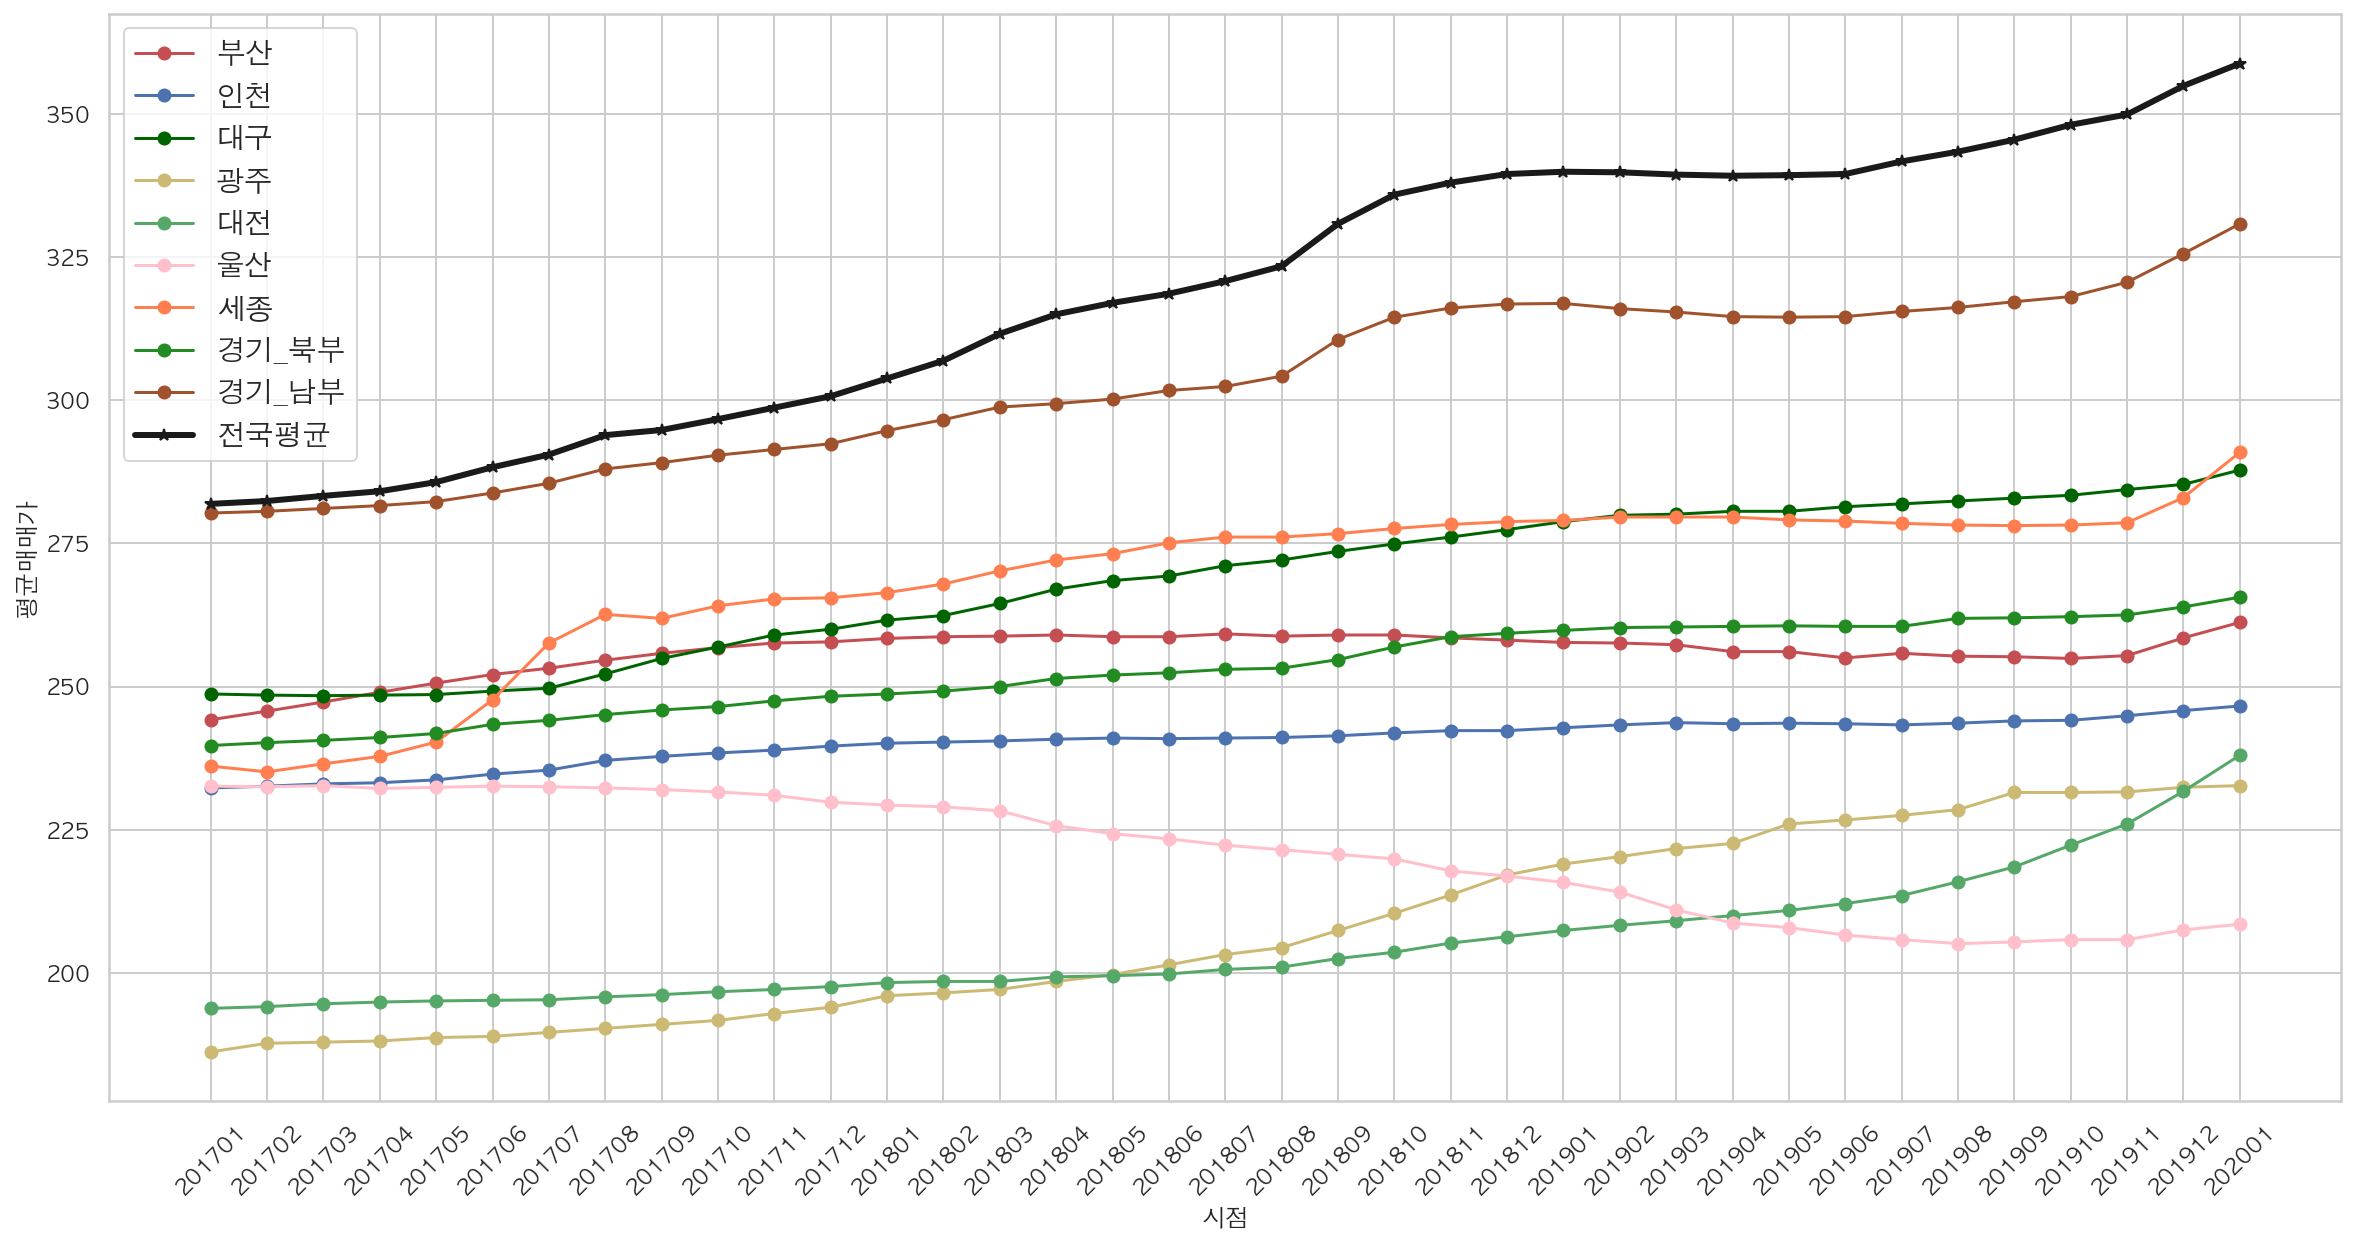

In [158]:
# 광역시 + 경기도 평균 시세 비교

plt.figure(figsize=(20, 10))
plt.plot(df_trend.T['부산'], marker='o', c='r', label='부산')
plt.plot(df_trend.T['인천'], marker='o', c='b', label='인천')
plt.plot(df_trend.T['대구'], marker='o', c='darkgreen', label='대구')
plt.plot(df_trend.T['광주'], marker='o', c='y', label='광주')
plt.plot(df_trend.T['대전'], marker='o', c='g', label='대전')
plt.plot(df_trend.T['울산'], marker='o', c='pink', label='울산')
plt.plot(df_trend.T['세종'], marker='o', c='coral', label='세종')
plt.plot(df_trend.T['경기_북부'], marker='o', c='forestgreen', label='경기_북부')
plt.plot(df_trend.T['경기_남부'], marker='o', c='sienna', label='경기_남부')
plt.plot(df_trend.T['전국'], marker='*', c='k', linewidth=3, label='전국평균')

plt.xlabel('시점')
plt.ylabel('평균매매가')
plt.xticks(rotation=45)

plt.legend(fontsize='x-large')

plt.show()

### 광역시 + 경기도 평균
- 서울의 영향으로 전국 평균 아래 분포

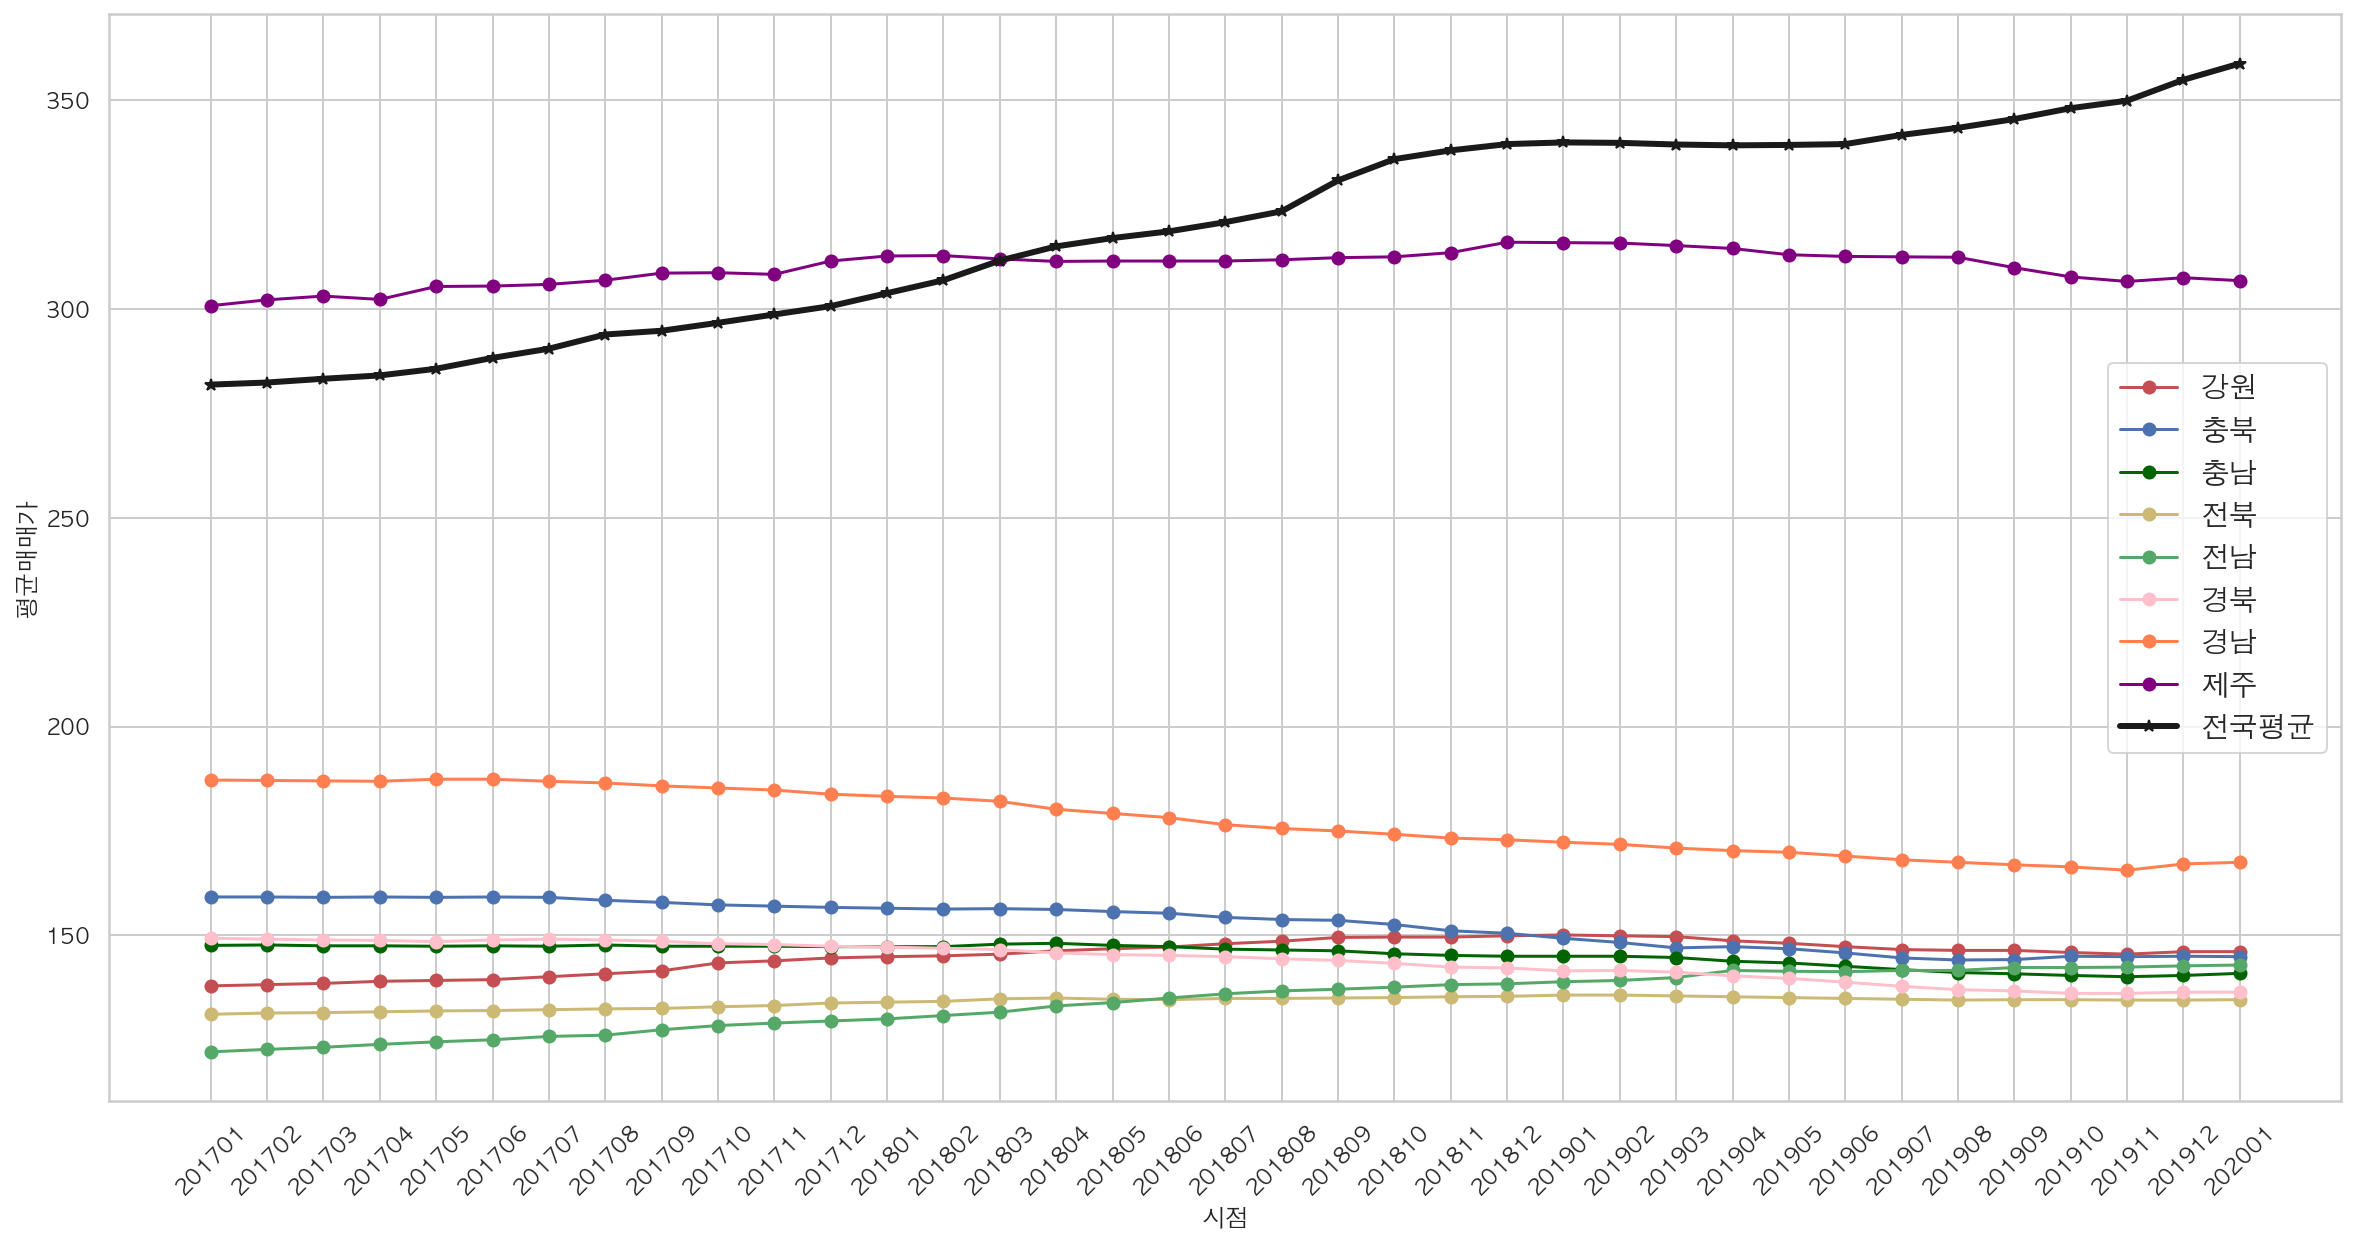

In [159]:
# 지방 평균 시세 비교

plt.figure(figsize=(20, 10))
plt.plot(df_trend.T['강원도'], marker='o', c='r', label='강원')
plt.plot(df_trend.T['충북'], marker='o', c='b', label='충북')
plt.plot(df_trend.T['충남'], marker='o',c='darkgreen', label='충남')
plt.plot(df_trend.T['전북'], marker='o',c='y', label='전북')
plt.plot(df_trend.T['전남'], marker='o',c='g', label='전남')
plt.plot(df_trend.T['경북'], marker='o',c='pink', label='경북')
plt.plot(df_trend.T['경남'], marker='o',c='coral', label='경남')
plt.plot(df_trend.T['제주'], marker='o',c='purple', label='제주')
plt.plot(df_trend.T['전국'], marker='*',c='k', linewidth=3, label='전국평균')
plt.xlabel('시점')
plt.ylabel('평균매매가')
plt.xticks(rotation=45)

plt.legend(fontsize='x-large')

plt.show()

### 지방 평균 시세
- 제주: 다른 지방과 비교하여 상대적으로 높음 
    - 외국인의 무비자 입국의 영향을 받고 있는 것으로 파악
    
- 부동산은 다른 산업으로 인한 인구의 유동성과 밀접한 영향이 있는 것으로 파악

In [161]:
df_trend.T

서울_강남3구  서울_마용성  서울_서남부  서울_동북부  서울_서북부     인천     부산     대구     광주  \
201701    822.6   594.9   457.0   430.1   467.7  232.3  244.2  248.7  186.2   
201702    823.8   596.5   457.8   430.7   469.2  232.6  245.7  248.5  187.7   
201703    827.2   601.4   459.1   431.7   472.6  233.0  247.3  248.4  187.9   
201704    831.1   604.0   461.7   433.1   473.9  233.2  249.0  248.5  188.1   
201705    841.2   609.8   464.2   436.9   477.0  233.7  250.6  248.6  188.7   
201706    860.9   617.3   469.1   442.5   480.6  234.7  252.1  249.2  188.9   
201707    873.0   624.3   474.8   445.1   484.6  235.4  253.2  249.7  189.6   
201708    896.8   636.5   485.2   452.6   489.6  237.1  254.6  252.2  190.3   
201709    899.1   641.7   488.7   451.4   491.4  237.8  255.8  254.9  191.0   
201710    910.0   646.8   493.7   455.2   497.7  238.4  256.8  256.9  191.7   
201711    924.9   656.7   497.5   460.0   500.8  238.9  257.6  259.0  192.9   
201712    941.8   664.4   502.1   463.2   503.6  239.6  257.8  260.0  194.0   
201801    971.6   679.7   508.5   468.8   506.4  240.1  258.4  261.6  196.0   
201802   1002.3   694.7   513.5   475.0   509.9  240.3  258.7  262.4  196.5   
201803   1042.6   718.6   524.4   486.2   519.8  240.5  258.8  264.5  197.1   
201804   1064.9   739.9   536.3   492.8   527.7  240.8  259.0  267.0  198.5   
201805   1075.4   750.3   543.9   499.0   532.5  241.0  258.7  268.5  199.7   
201806   1079.8   760.4   548.9   504.3   538.1  240.9  258.7  269.3  201.4   
201807   1086.5   774.0   556.8   511.3   546.8  241.0  259.2  271.1  203.2   
201808   1102.3   788.4   566.9   517.5   553.8  241.1  258.8  272.1  204.4   
201809   1147.1   824.9   596.5   541.6   569.0  241.4  259.0  273.6  207.4   
201810   1175.4   843.6   617.9   558.0   585.2  241.9  259.0  274.9  210.4   
201811   1182.5   853.5   627.2   565.2   591.8  242.3  258.5  276.1  213.6   
201812   1192.6   858.1   630.7   568.1   596.9  242.3  258.1  277.4  217.1   
201901   1188.2   860.0   633.2   570.3   599.5  242.8  257.7  278.8  219.0   
201902   1181.7   860.1   633.8   572.7   600.6  243.3  257.6  279.9  220.3   
201903   1174.8   860.1   634.0   572.3   602.6  243.7  257.3  280.1  221.7   
201904   1168.9   862.5   634.1   572.7   605.4  243.5  256.1  280.6  222.6   
201905   1169.6   862.3   634.7   573.5   607.3  243.6  256.1  280.6  226.0   
201906   1174.3   864.1   635.6   575.3   607.8  243.5  255.0  281.4  226.7   
201907   1200.2   875.2   639.8   580.1   611.2  243.3  255.8  281.9  227.5   
201908   1216.4   882.5   643.7   585.2   615.4  243.6  255.3  282.4  228.5   
201909   1224.0   894.8   649.8   593.0   622.4  244.0  255.2  282.9  231.5   
201910   1250.0   905.5   657.9   599.8   627.2  244.1  254.9  283.4  231.5   
201911   1246.6   916.9   667.7   606.8   633.9  244.9  255.4  284.4  231.6   
201912   1281.1   938.3   682.1   610.1   643.3  245.8  258.5  285.3  232.4   
202001   1295.9   951.8   693.5   620.5   650.6  246.6  261.2  287.8  232.7   

           대전     울산     세종  경기_북부  경기_남부    강원도     충북     충남     전북     전남  \
201701  193.8  232.6  236.1  239.7  280.3  137.9  159.2  147.6  131.1  122.1   
201702  194.1  232.5  235.1  240.2  280.6  138.2  159.2  147.7  131.4  122.7   
201703  194.6  232.7  236.5  240.6  281.1  138.5  159.1  147.5  131.5  123.2   
201704  194.9  232.2  237.8  241.1  281.6  139.0  159.2  147.5  131.7  123.9   
201705  195.1  232.4  240.3  241.8  282.3  139.2  159.1  147.4  131.9  124.5   
201706  195.2  232.6  247.7  243.4  283.8  139.4  159.2  147.5  132.0  125.0   
201707  195.3  232.5  257.6  244.1  285.5  140.1  159.1  147.4  132.2  125.8   
201708  195.8  232.3  262.6  245.1  288.0  140.8  158.4  147.7  132.4  126.1   
201709  196.2  232.0  261.9  245.9  289.1  141.5  157.9  147.4  132.5  127.4   
201710  196.7  231.6  264.1  246.5  290.4  143.4  157.3  147.4  132.9  128.4   
201711  197.1  231.0  265.3  247.5  291.4  143.9  157.0  147.4  133.2  129.0   
201712  197.6  229.8  265.5  248.3  292.4  14

In [165]:
# 상승률 비교

fin_price = df_trend.T.loc['202001']
st_price = df_trend.T.loc['201701']

aug = (fin_price - st_price) / st_price * 100

In [166]:
aug = aug.astype(int)
aug

서울_강남3구    57
서울_마용성     59
서울_서남부     51
서울_동북부     44
서울_서북부     39
인천          6
부산          6
대구         15
광주         24
대전         22
울산        -10
세종         23
경기_북부      10
경기_남부      18
강원도         5
충북         -8
충남         -4
전북          2
전남         17
경북         -8
경남        -10
제주          1
전국         27
dtype: int64

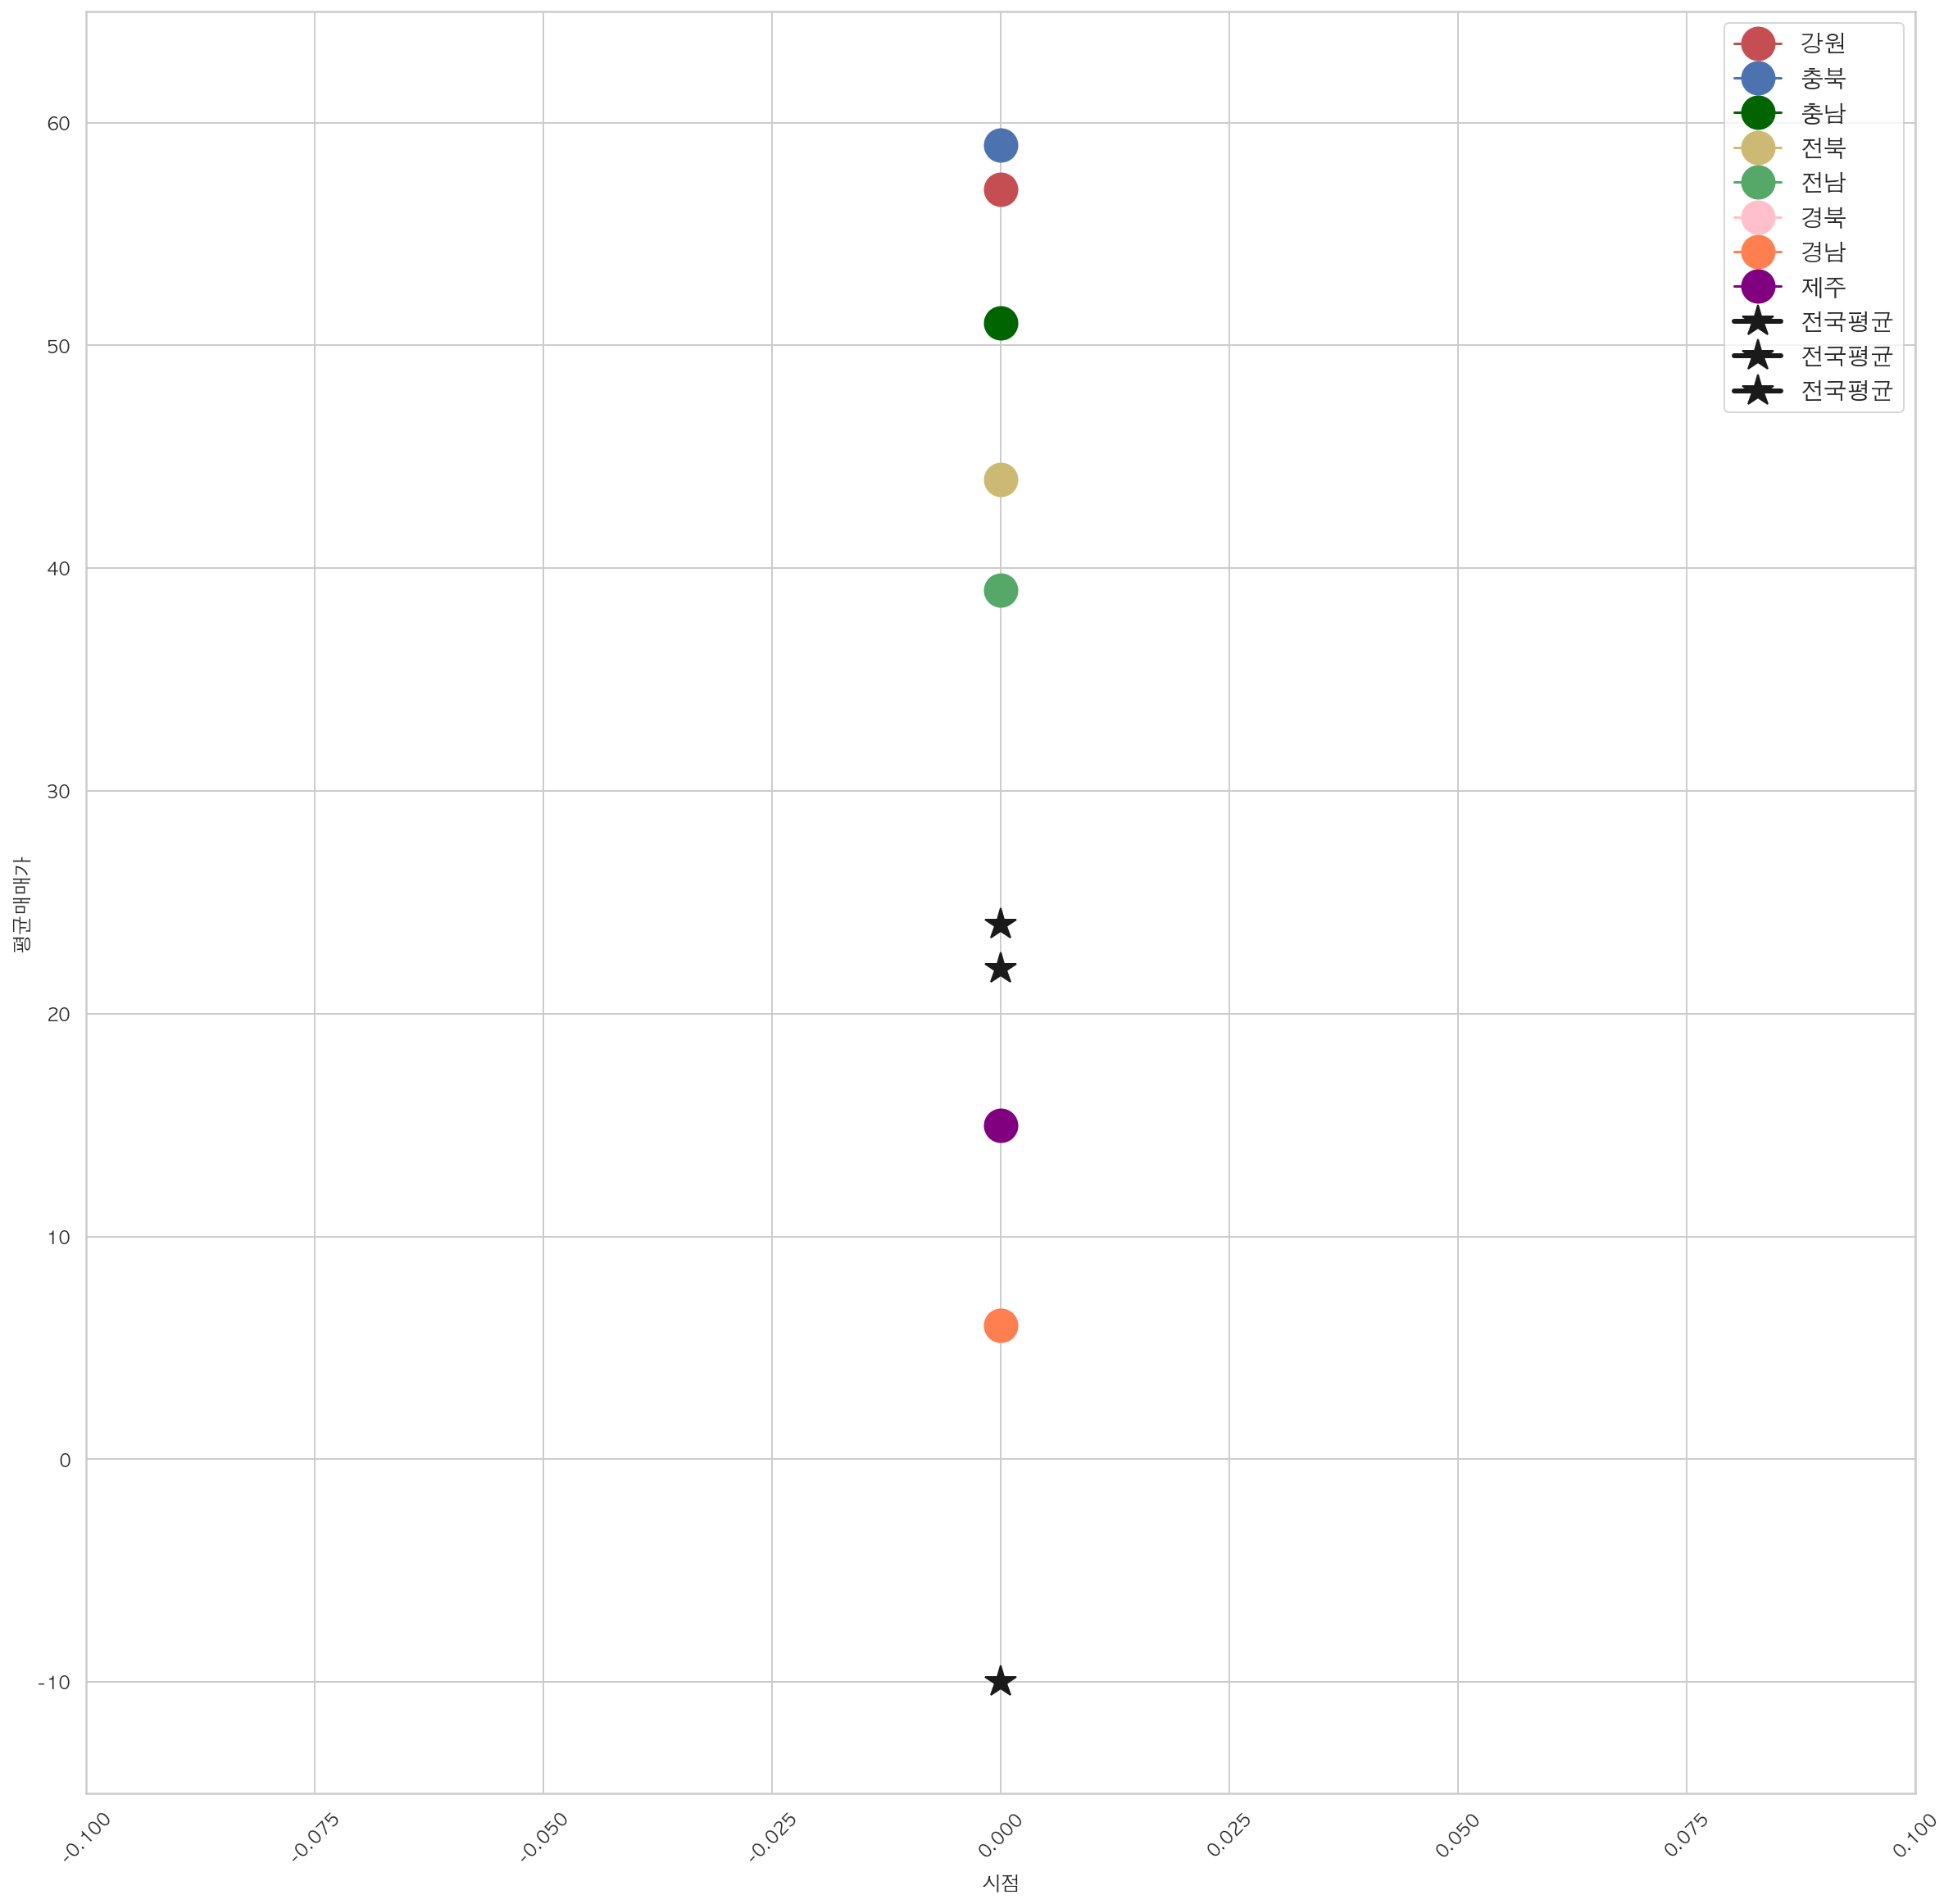

In [190]:
plt.figure(figsize=(20, 20))
plt.plot(aug['서울_강남3구'], marker='o', c='r', label='강원', markersize=20)
plt.plot(aug['서울_마용성'], marker='o', c='b', label='충북', markersize=20)
plt.plot(aug['서울_서남부'], marker='o', c='darkgreen', label='충남', markersize=20)
plt.plot(aug['서울_동북부'], marker='o', c='y', label='전북', markersize=20)
plt.plot(aug['서울_서북부'], marker='o', c='g', label='전남', markersize=20)
plt.plot(aug['인천'], marker='o', c='pink', label='경북', markersize=20)
plt.plot(aug['부산'], marker='o', c='coral', label='경남', markersize=20)
plt.plot(aug['대구'], marker='o', c='purple', label='제주', markersize=20)
plt.plot(aug['광주'], marker='*', c='k', linewidth=3, label='전국평균', markersize=20)
plt.plot(aug['대전'], marker='*', c='k', linewidth=3, label='전국평균', markersize=20)
plt.plot(aug['울산'], marker='*', c='k', linewidth=3, label='전국평균', markersize=20)

plt.xlabel('시점')
plt.ylabel('평균매매가')
plt.xticks(rotation=45)
plt.xlim(-0.1, 0.1)
plt.ylim(-15, 65)

plt.legend(fontsize='x-large')

plt.show()

### 결론

1. 분양가격은 실제 아파트의 가격은 깊은 관계가 있다. 
 - 수도권이 지방에 비해 밀접한 관계가 있으며, 
 - 지방의 경우, 중대형, 대형이 더 밀접한 관계를 보임.

2. 분양가격이 높은 부동산의 수익률은 분양가격이 낮은 곳보다 더 좋을 것이다. 
 - 서울, 수도권의 경우: 분양가의 지수 형성이 실거래가의 지수 형성보다 높다. 
 - 시세차익을 위해서는 지방의 중대형 평수를 분양 받는 것이 좋다고 판단된다. 

3. 부동산이 다른 금융상품 투자에 비해 수익률이 더 좋을 것이다. 
 - 자료 불충분 결론 도달 못함